# Load libraries

In [176]:
#pragma nodebook off
#Use nodebook for better reproducibility https://github.com/uoa-eResearch/nodebook
%reload_ext nodebook.ipython
%nodebook disk train

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd # Tabular data
import numpy as np # Numerical operations
import geopandas as gpd # Vector geospatial operations
import contextily as ctx # Used for contextual basemaps
import seaborn # Plotting
seaborn.set()
import matplotlib.pyplot as plt # Plotting
import os # File system operations
import zipfile # ZIP file operations
from glob import glob # Recursive file lookup
from unidecode import unidecode # Remove macrons
from tqdm.auto import tqdm # progress bars
tqdm.pandas()
# ML stuff
import sklearn.ensemble
import sklearn.linear_model
from sklearn.multioutput import MultiOutputRegressor
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (20, 20) # Large plots by default

In [ ]:
glob("input/**/*", recursive=True)

['input/subnational-population-projections-2018base-2048.xlsx',
 'input/statsnzterritorial-authority-local-board-2021-clipped-generalised-FGDB.zip',
 'input/hospital_discharges',
 'input/total_household_income_2013_2018_census_by_DHB.xlsx',
 'input/statsnzdistrict-health-board-2015-FGDB.zip',
 'input/NZ_Public_Hospitals.geojson',
 'input/hospital_discharges/pubfund2016_17data.zip',
 'input/hospital_discharges/pubfund2015_16data.zip',
 'input/hospital_discharges/publicly-funded-discharges-2013-14-data.zip',
 'input/hospital_discharges/publicly-funded-discharges-2014-15-data.zip',
 'input/hospital_discharges/publicly-funded-hospital-data-2017-2018.zip',
 'input/hospital_discharges/publicly-funded-hospital-data-2018-2019.zip']

# Load data

In [ ]:
DHB = gpd.read_file("input/statsnzdistrict-health-board-2015-FGDB.zip!district-health-board-2015.gdb")
DHB = DHB[DHB.DHB2015_Name != "Area outside District Health Board"]
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336..."
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921..."
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708..."
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573..."
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889..."
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819..."
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391..."
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876..."
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412..."


In [ ]:
hosp = gpd.read_file("input/NZ_Public_Hospitals.geojson")
hosp

,Premises_Name,Certification_Service_Type,Service_Types,Total_Beds,Premises_Website,Premises_Address_Other,Premises_Address,Premises_Address_Suburb_Road,Premises_Address_Town_City,Premises_Address_Post_Code,...,Legal_Entity_Address_Suburb_Roa,Legal_Entity_Address_Town_City,Legal_Entity_Address_Post_Code,Legal_Entity_Postal_Address,Legal_Entity_Postal_Address_Sub,Legal_Entity_Postal_Address_Tow,Legal_Entity_Postal_Address_Pos,Legal_Entity_Website,ObjectId,geometry
0,Auckland City Hospital,Public Hospital,"Childrens health, Maternity, Surgical, Medical",1124,None,None,2 Park Road,Grafton,Auckland,1023,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,1,POINT (174.76948 -36.86089)
1,Auckland DHB X 3 Units - Mental Health,Public Hospital,Mental health,96,None,None,2 Park Road,Grafton,Auckland,1023,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,2,POINT (174.76948 -36.86089)
2,Buchanan Rehabilitation Centre,Public Hospital,Mental health,40,None,None,27 Sutherland Road,Point Chevalier,Auckland,1025,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,3,POINT (174.71239 -36.87277)
3,Greenlane Clinical Centre,Public Hospital,"Surgical, Medical",31,None,None,214 Green Lane West,Epsom,Auckland,1051,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,4,POINT (174.77965 -36.89332)
4,Opotiki Health Care Centre,Public Hospital,"Maternity, Surgical, Medical",6,None,None,32A King Street,None,Opotiki,3122,...,None,Tauranga,3112,Private Bag 12024,None,Tauranga,3143,None,5,POINT (177.28553 -38.00635)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Waitakere Hospital,Public Hospital,"Geriatric, Childrens health, Surgical, Mental ...",283,None,None,55 Lincoln Road,Henderson,Auckland,0610,...,None,Auckland,622,PO Box 93503,None,Auckland,740,None,79,POINT (174.62866 -36.86952)
79,Wilson Centre,Public Hospital,"Physical, Childrens health",26,None,None,1 St Leonards Road,Hauraki,Auckland,0622,...,None,Auckland,622,PO Box 93503,None,Auckland,740,None,80,POINT (174.78800 -36.79983)
80,Buller Health,Public Hospital,"Maternity, Medical",8,None,None,45 Derby Street,None,Westport,7825,...,None,Greymouth,7805,PO Box 387,None,Greymouth 7840,7840,None,81,POINT (171.60491 -41.74922)
81,Grey Base Hospital,Public Hospital,"Dementia care, Geriatric, Mental health, Child...",114,None,None,71 Water Walk Road,None,Greymouth,7805,...,None,Greymouth,7805,PO Box 387,None,Greymouth 7840,7840,None,82,POINT (171.19210 -42.46327)


In [ ]:
TALB = gpd.read_file("input/statsnzterritorial-authority-local-board-2021-clipped-generalised-FGDB.zip!territorial-authority-local-board-2021-clipped-generalised.gdb")
TALB = TALB[TALB.TALB2021_V1_00_NAME_ASCII != "Area Outside Territorial Authority"]
TALB

,TALB2021_V1_00,TALB2021_V1_00_NAME,TALB2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,00100,Far North District,Far North District,6686.751655,6699.099475,2.167299e+06,"MULTIPOLYGON (((1643927.274 6083897.824, 16439..."
1,00200,Whangarei District,Whangarei District,2712.118612,2712.118612,9.223848e+05,"MULTIPOLYGON (((1752996.594 6015585.829, 17530..."
2,00300,Kaipara District,Kaipara District,3108.960347,3108.960347,9.341178e+05,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
3,01100,Thames-Coromandel District,Thames-Coromandel District,2207.766906,2207.766906,8.204000e+05,"MULTIPOLYGON (((1857357.606 5876615.882, 18573..."
4,01200,Hauraki District,Hauraki District,1270.133527,1270.133527,3.112825e+05,"MULTIPOLYGON (((1824948.875 5883405.558, 18249..."
...,...,...,...,...,...,...,...
82,07617,Māngere-Ōtāhuhu Local Board Area,Mangere-Otahuhu Local Board Area,52.478523,52.478523,1.097939e+05,"MULTIPOLYGON (((1758426.203 5908461.836, 17584..."
83,07618,Ōtara-Papatoetoe Local Board Area,Otara-Papatoetoe Local Board Area,37.110464,37.110464,6.770070e+04,"MULTIPOLYGON (((1765765.640 5909501.655, 17657..."
84,07619,Manurewa Local Board Area,Manurewa Local Board Area,37.110528,37.110528,4.641286e+04,"MULTIPOLYGON (((1769432.488 5904664.673, 17694..."
85,07620,Papakura Local Board Area,Papakura Local Board Area,40.216977,40.216977,6.140098e+04,"MULTIPOLYGON (((1772419.010 5901843.751, 17725..."


In [ ]:
# From https://www.stats.govt.nz/information-releases/subnational-population-projections-2018base2048#map
pop = pd.concat(pd.read_excel(
    "input/subnational-population-projections-2018base-2048.xlsx",
    sheet_name=["Table 5", "Table 6"],
    skiprows=5,
    usecols="A:G,L",
    names=["area", "year", "0-14", "15-39", "40-64", "65+", "total", "median age"],
    engine='openpyxl'
))
# Drop notes
pop.dropna(subset=["year"], inplace=True)
# Fill area forward
pop.area.fillna(method="ffill", inplace=True)
pop.reset_index(inplace=True)
pop.area.replace("Maungakiekie-Tamaki local board area", "Maungakiekie-Tāmaki local board area", inplace=True)
pop.area.replace("Great Barrier local board area", "Aotea/Great Barrier local board area", inplace=True)
# Fix up dtypes
cols = ["0-14", "15-39", "40-64", "65+", "total"]
pop[cols] = pop[cols].astype(int)
pop.year = pop.year.astype(int).astype(str)
pop

,level_0,level_1,area,year,0-14,15-39,40-64,65+,total,median age
0,Table 5,0,Far North district,1996,15200,17700,15600,6100,54500,33.4
1,Table 5,1,Far North district,2001,14900,16400,18100,7000,56400,36.3
2,Table 5,2,Far North district,2006,13800,15700,20000,7900,57500,39.0
3,Table 5,3,Far North district,2013,13800,15100,21300,10500,60600,42.0
4,Table 5,4,Far North district,2018,14500,17600,22800,13000,67900,42.8
...,...,...,...,...,...,...,...,...,...,...
963,Table 6,226,Franklin local board area,2028,17800,30000,30600,18500,96900,40.5
964,Table 6,227,Franklin local board area,2033,19700,33400,33800,22500,109400,41.0
965,Table 6,228,Franklin local board area,2038,22100,36100,37500,26300,122000,41.6
966,Table 6,229,Franklin local board area,2043,24300,38500,42600,29100,134500,42.2


In [ ]:
popyears = pop.year.unique()
popyears

array(['1996', '2001', '2006', '2013', '2018', '2023', '2028', '2033',
       '2038', '2043', '2048'], dtype=object)

<AxesSubplot:xlabel='year'>

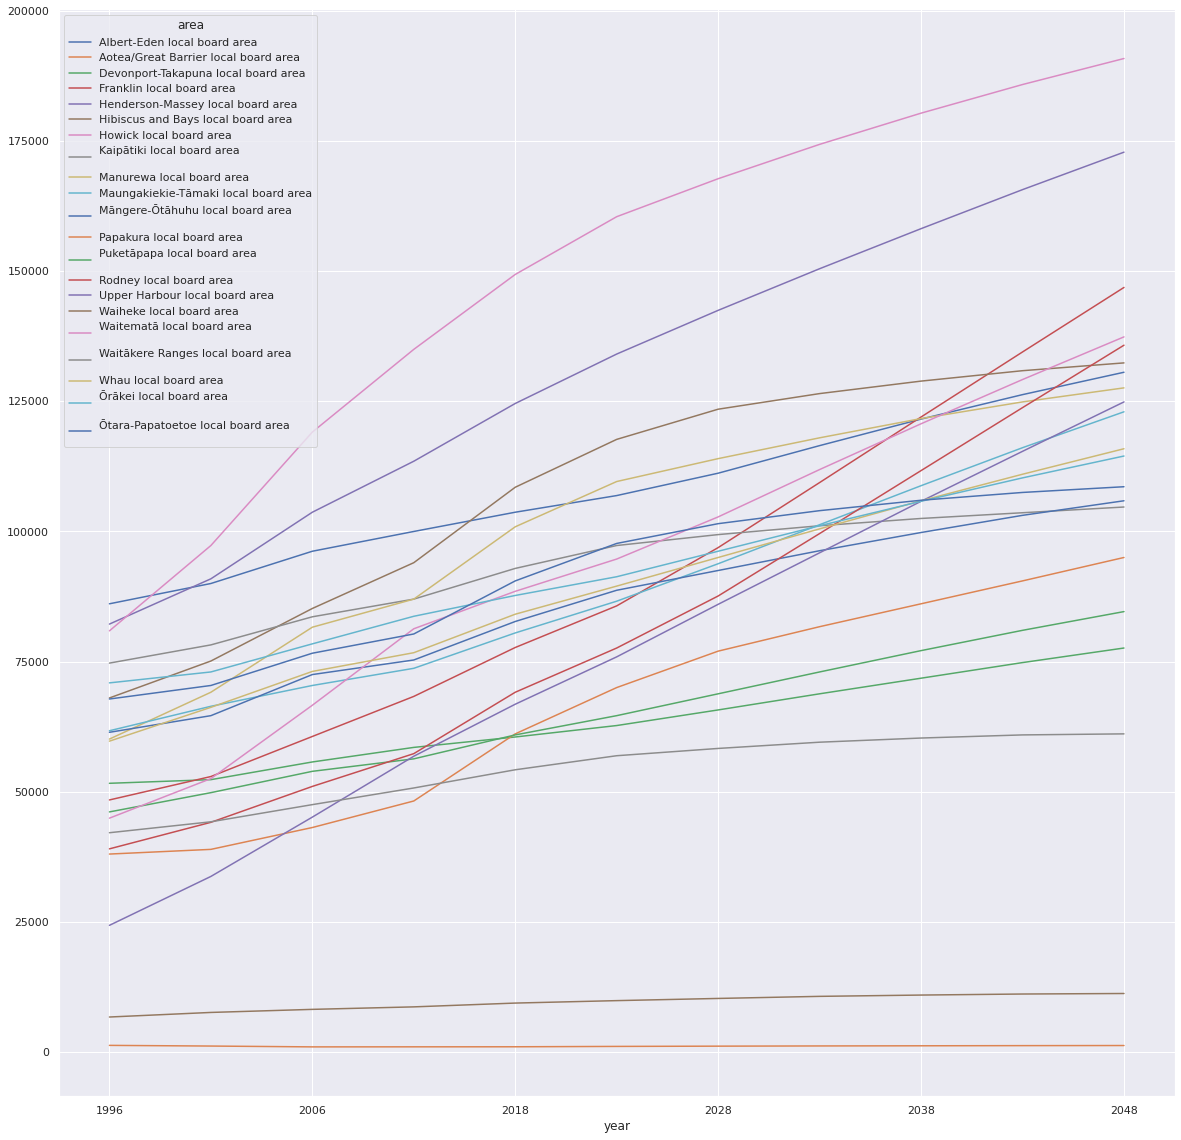

In [ ]:
pop[pop.area.str.contains("local")].pivot(index='year', columns='area', values='total').plot()

In [ ]:
# Restructure population data so we have one row per area, and all population projections in columns
rows = []
for area in pop.area.unique():
    row = {"area": area}
    for year in pop.year.unique():
        for c in ["0-14", "15-39", "40-64", "65+", "total", "median age"]:
            new_col = f"pop_{year}_{c}"
            value = pop.loc[(pop.year == year) & (pop.area == area), c].iloc[0]
            row[new_col] = value
    rows.append(row)
pop = pd.DataFrame(rows)
pop

,area,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,pop_1996_median age,pop_2001_0-14,pop_2001_15-39,pop_2001_40-64,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,Far North district,15200,17700,15600,6100,54500,33.4,14900,16400,18100,...,23700,23500,80600,48.1,14100,19400,24400,23800,81700,48.5
1,Whangārei district\n,17300,23300,19100,8700,68400,33.9,17000,21600,21700,...,34400,31700,116400,46.1,20100,30800,35800,32600,119300,46.3
2,Kaipara district,4700,5700,5200,2200,17800,34.4,4450,5150,6000,...,8200,10500,29800,52.9,4900,6500,8200,10700,30300,53.4
3,Auckland,255600,451400,296500,112300,1115800,32.1,277800,469900,351000,...,717000,402500,2207800,40.5,353000,754000,761900,434000,2302900,41.3
4,Thames-Coromandel district,5200,7100,8200,4800,25400,41.0,5000,6400,9100,...,9400,14300,33300,59.9,3800,5400,9400,14200,32800,60.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Māngere-Ōtāhuhu local board area\n,18500,25300,13600,4000,61400,26.7,20000,25200,15100,...,31400,16100,103100,37.1,20400,35200,33100,17300,105900,38.3
84,Ōtara-Papatoetoe local board area\n,19200,27900,15200,5500,67800,27.6,20500,27300,16900,...,35800,14800,107500,37.9,18800,37000,37000,15900,108600,39.1
85,Manurewa local board area,17700,25400,13200,3800,60100,27.7,20200,27300,16900,...,38700,19200,124900,37.4,24300,42300,40400,20500,127600,38.5
86,Papakura local board area,9700,15100,9700,3500,38000,30.3,10000,14400,10800,...,28700,14300,90500,38.0,18200,31400,29600,15800,95000,38.4


In [ ]:
cols = pop.columns[pop.columns!="area"].tolist()
cols

['pop_1996_0-14',
 'pop_1996_15-39',
 'pop_1996_40-64',
 'pop_1996_65+',
 'pop_1996_total',
 'pop_1996_median age',
 'pop_2001_0-14',
 'pop_2001_15-39',
 'pop_2001_40-64',
 'pop_2001_65+',
 'pop_2001_total',
 'pop_2001_median age',
 'pop_2006_0-14',
 'pop_2006_15-39',
 'pop_2006_40-64',
 'pop_2006_65+',
 'pop_2006_total',
 'pop_2006_median age',
 'pop_2013_0-14',
 'pop_2013_15-39',
 'pop_2013_40-64',
 'pop_2013_65+',
 'pop_2013_total',
 'pop_2013_median age',
 'pop_2018_0-14',
 'pop_2018_15-39',
 'pop_2018_40-64',
 'pop_2018_65+',
 'pop_2018_total',
 'pop_2018_median age',
 'pop_2023_0-14',
 'pop_2023_15-39',
 'pop_2023_40-64',
 'pop_2023_65+',
 'pop_2023_total',
 'pop_2023_median age',
 'pop_2028_0-14',
 'pop_2028_15-39',
 'pop_2028_40-64',
 'pop_2028_65+',
 'pop_2028_total',
 'pop_2028_median age',
 'pop_2033_0-14',
 'pop_2033_15-39',
 'pop_2033_40-64',
 'pop_2033_65+',
 'pop_2033_total',
 'pop_2033_median age',
 'pop_2038_0-14',
 'pop_2038_15-39',
 'pop_2038_40-64',
 'pop_2038_65+',

In [ ]:
pop.area.tolist()

['Far North district',
 'Whangārei district\n',
 'Kaipara district',
 'Auckland',
 'Thames-Coromandel district',
 'Hauraki district',
 'Waikato district',
 'Matamata-Piako district',
 'Hamilton city',
 'Waipa district',
 'Ōtorohanga district\n',
 'South Waikato district',
 'Waitomo district',
 'Taupō district\n',
 'Western Bay of Plenty district',
 'Tauranga city',
 'Rotorua district',
 'Whakatāne district\n',
 'Kawerau district',
 'Ōpōtiki district\n',
 'Gisborne district',
 'Wairoa district',
 'Hastings district',
 'Napier city',
 "Central Hawke's Bay district",
 'New Plymouth district',
 'Stratford district',
 'South Taranaki district',
 'Ruapehu district',
 'Whanganui district',
 'Rangitikei district',
 'Manawatū district\n',
 'Palmerston North city',
 'Tararua district',
 'Horowhenua district',
 'Kapiti Coast district',
 'Porirua city',
 'Upper Hutt city',
 'Lower Hutt city',
 'Wellington city',
 'Masterton district',
 'Carterton district',
 'South Wairarapa district',
 'Tasman di

In [ ]:
def normalise(string):
    return unidecode(string.lower().strip())
# Augment TALB geodataframe with population information
TALB = pd.merge(TALB,
               pop,
               left_on=TALB.TALB2021_V1_00_NAME.apply(normalise),
               right_on=pop.area.map(normalise),
               how="left")
TALB[["TALB2021_V1_00_NAME"] + cols]

,TALB2021_V1_00_NAME,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,pop_1996_median age,pop_2001_0-14,pop_2001_15-39,pop_2001_40-64,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,Far North District,15200,17700,15600,6100,54500,33.4,14900,16400,18100,...,23700,23500,80600,48.1,14100,19400,24400,23800,81700,48.5
1,Whangarei District,17300,23300,19100,8700,68400,33.9,17000,21600,21700,...,34400,31700,116400,46.1,20100,30800,35800,32600,119300,46.3
2,Kaipara District,4700,5700,5200,2200,17800,34.4,4450,5150,6000,...,8200,10500,29800,52.9,4900,6500,8200,10700,30300,53.4
3,Thames-Coromandel District,5200,7100,8200,4800,25400,41.0,5000,6400,9100,...,9400,14300,33300,59.9,3800,5400,9400,14200,32800,60.3
4,Hauraki District,5000,6250,5100,2250,18550,33.5,4550,5150,5700,...,6200,8200,22100,54.6,3200,4300,6100,8200,21800,55.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Māngere-Ōtāhuhu Local Board Area,18500,25300,13600,4000,61400,26.7,20000,25200,15100,...,31400,16100,103100,37.1,20400,35200,33100,17300,105900,38.3
83,Ōtara-Papatoetoe Local Board Area,19200,27900,15200,5500,67800,27.6,20500,27300,16900,...,35800,14800,107500,37.9,18800,37000,37000,15900,108600,39.1
84,Manurewa Local Board Area,17700,25400,13200,3800,60100,27.7,20200,27300,16900,...,38700,19200,124900,37.4,24300,42300,40400,20500,127600,38.5
85,Papakura Local Board Area,9700,15100,9700,3500,38000,30.3,10000,14400,10800,...,28700,14300,90500,38.0,18200,31400,29600,15800,95000,38.4


In [ ]:
assert all(~TALB.isna())

<AxesSubplot:>

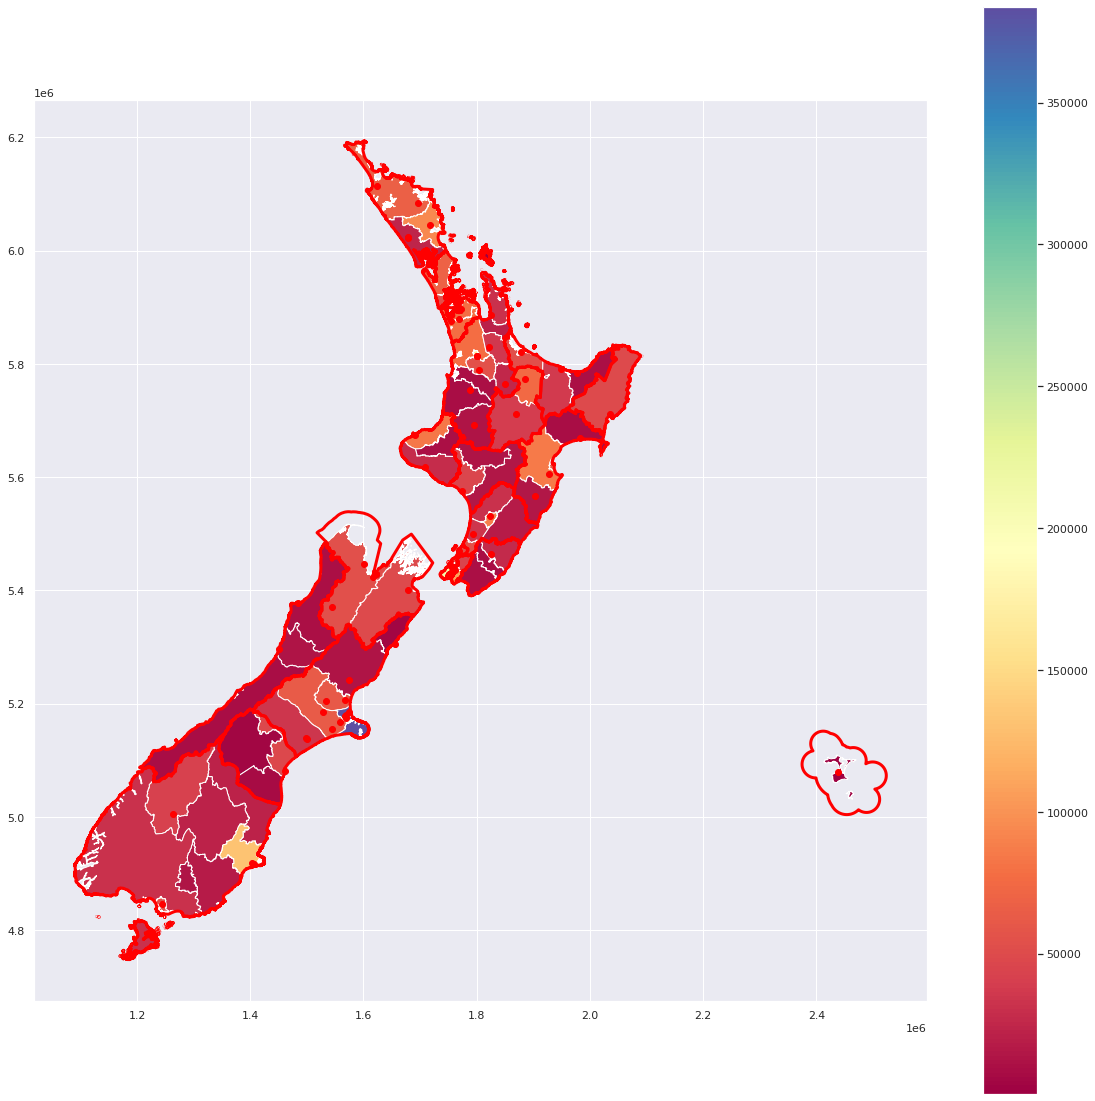

In [ ]:
ax = TALB.plot(column="pop_2018_total", cmap="Spectral", legend=True)
DHB.boundary.plot(ax=ax, color="red", linewidth=3)
hosp.to_crs(DHB.crs).plot(ax=ax, color="red")

[1704081.5934     5838535.95349979 1806275.24620008 6001802.16870022]


(5838535.953499794, 6001802.168700218)

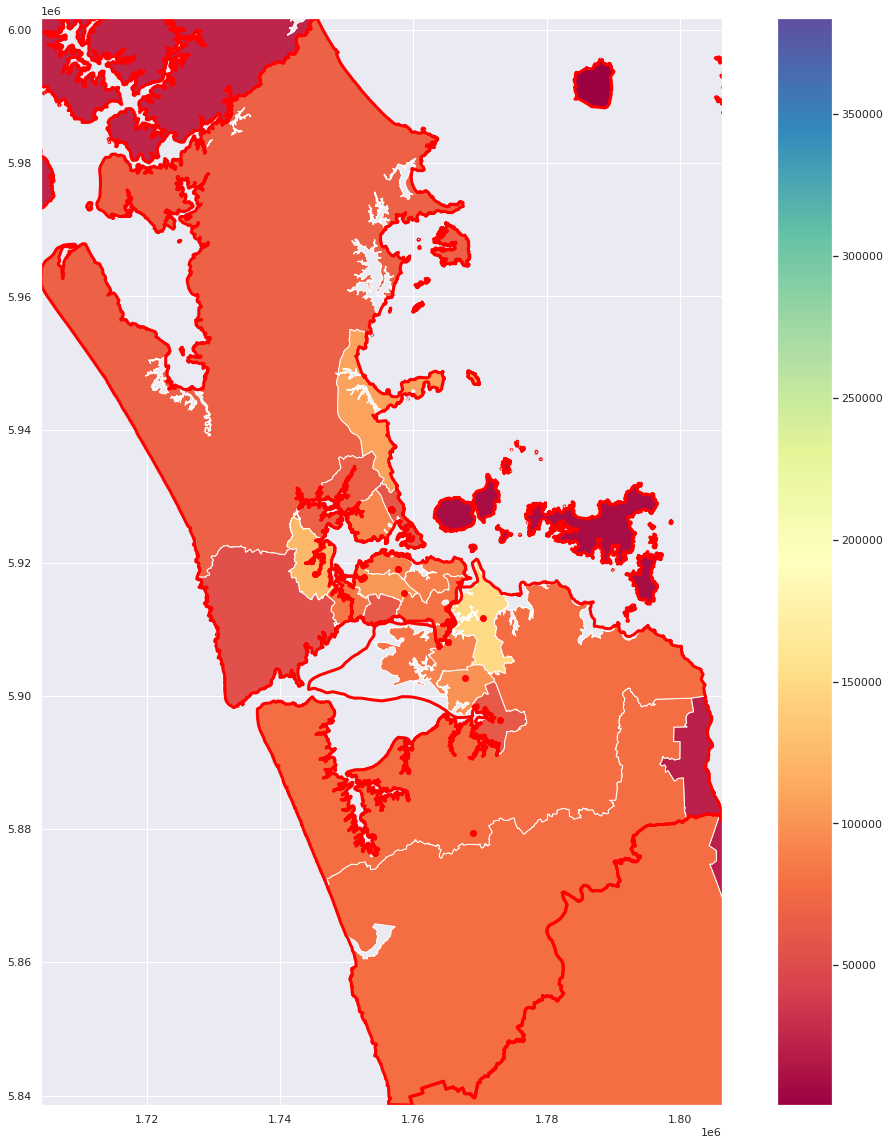

In [ ]:
AKL_bounds = DHB[DHB.DHB2015_Name.isin(["Counties Manukau", "Waitemata"])].total_bounds
print(AKL_bounds)
ax = TALB.plot(column="pop_2018_total", cmap="Spectral", legend=True)
DHB.boundary.plot(ax=ax, color="red", linewidth=3)
hosp.to_crs(DHB.crs).plot(ax=ax, color="red")
ax.set_xlim(AKL_bounds[0], AKL_bounds[2])
ax.set_ylim(AKL_bounds[1], AKL_bounds[3])

In [ ]:
DHB["TALBs"] = DHB.geometry.progress_apply(
    lambda poly: ",".join(
        TALB.TALB2021_V1_00_NAME[TALB.representative_point().intersects(poly)]
    )
)
with pd.option_context('display.max_colwidth', None):
    display(DHB[["DHB2015_Name", "TALBs"]])

  0%|          | 0/20 [00:00<?, ?it/s]

,DHB2015_Name,TALBs
0,Northland,"Far North District,Whangarei District,Kaipara District"
1,Waitemata,"Rodney Local Board Area,Hibiscus and Bays Local Board Area,Upper Harbour Local Board Area,Kaipātiki Local Board Area,Devonport-Takapuna Local Board Area,Henderson-Massey Local Board Area,Waitākere Ranges Local Board Area"
2,Auckland,"Aotea/Great Barrier Local Board Area,Waiheke Local Board Area,Waitematā Local Board Area,Whau Local Board Area,Albert-Eden Local Board Area,Puketāpapa Local Board Area,Ōrākei Local Board Area,Maungakiekie-Tāmaki Local Board Area"
3,Counties Manukau,"Howick Local Board Area,Māngere-Ōtāhuhu Local Board Area,Ōtara-Papatoetoe Local Board Area,Manurewa Local Board Area,Papakura Local Board Area,Franklin Local Board Area"
4,Waikato,"Thames-Coromandel District,Hauraki District,Waikato District,Matamata-Piako District,Hamilton City,Waipa District,Ōtorohanga District,South Waikato District,Waitomo District,Ruapehu District"
5,Lakes,"Taupo District,Rotorua District"
6,Bay of Plenty,"Western Bay of Plenty District,Tauranga City,Whakatane District,Kawerau District,Ōpōtiki District"
7,Tairawhiti,Gisborne District
8,Taranaki,"New Plymouth District,Stratford District,South Taranaki District"
9,Hawke's Bay,"Wairoa District,Hastings District,Napier City,Central Hawke's Bay District"


In [ ]:
def get_DHB_pop(poly):
    mask = TALB.representative_point().intersects(poly)
    result = TALB.loc[mask, cols].sum()
    result.update(TALB.loc[mask, [c for c in cols if "median" in c]].median())
    return result
result = DHB.geometry.progress_apply(get_DHB_pop)
DHB = pd.concat([DHB, result], axis='columns')
DHB

  0%|          | 0/20 [00:00<?, ?it/s]

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,66300.0,65700.0,226800.0,48.10,39100.0,56700.0,68400.0,67100.0,231300.0,48.50
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,252500.0,155400.0,775100.0,41.20,127800.0,249200.0,264300.0,168200.0,809400.0,41.80
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,226460.0,112450.0,686180.0,40.60,89660.0,260580.0,248410.0,119650.0,718400.0,41.50
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,237900.0,134800.0,746400.0,37.95,135700.0,244100.0,249000.0,146200.0,774900.0,38.80
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,167850.0,132190.0,562780.0,45.75,97040.0,169260.0,174120.0,138900.0,579220.0,46.70
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,38200.0,31900.0,127800.0,45.30,21600.0,35300.0,39000.0,32600.0,128600.0,45.95
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,94260.0,88820.0,315410.0,47.40,50930.0,82910.0,96950.0,92840.0,323630.0,49.00
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,16500.0,13100.0,55000.0,43.40,10400.0,14500.0,16900.0,13400.0,55200.0,44.10
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,40450.0,36250.0,137150.0,44.90,23450.0,37050.0,40800.0,37250.0,138400.0,45.60
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,59730.0,53950.0,199530.0,46.60,33670.0,51940.0,61190.0,55310.0,201960.0,47.60


Text(0.5, 1.0, 'Population by DHB in 2018')

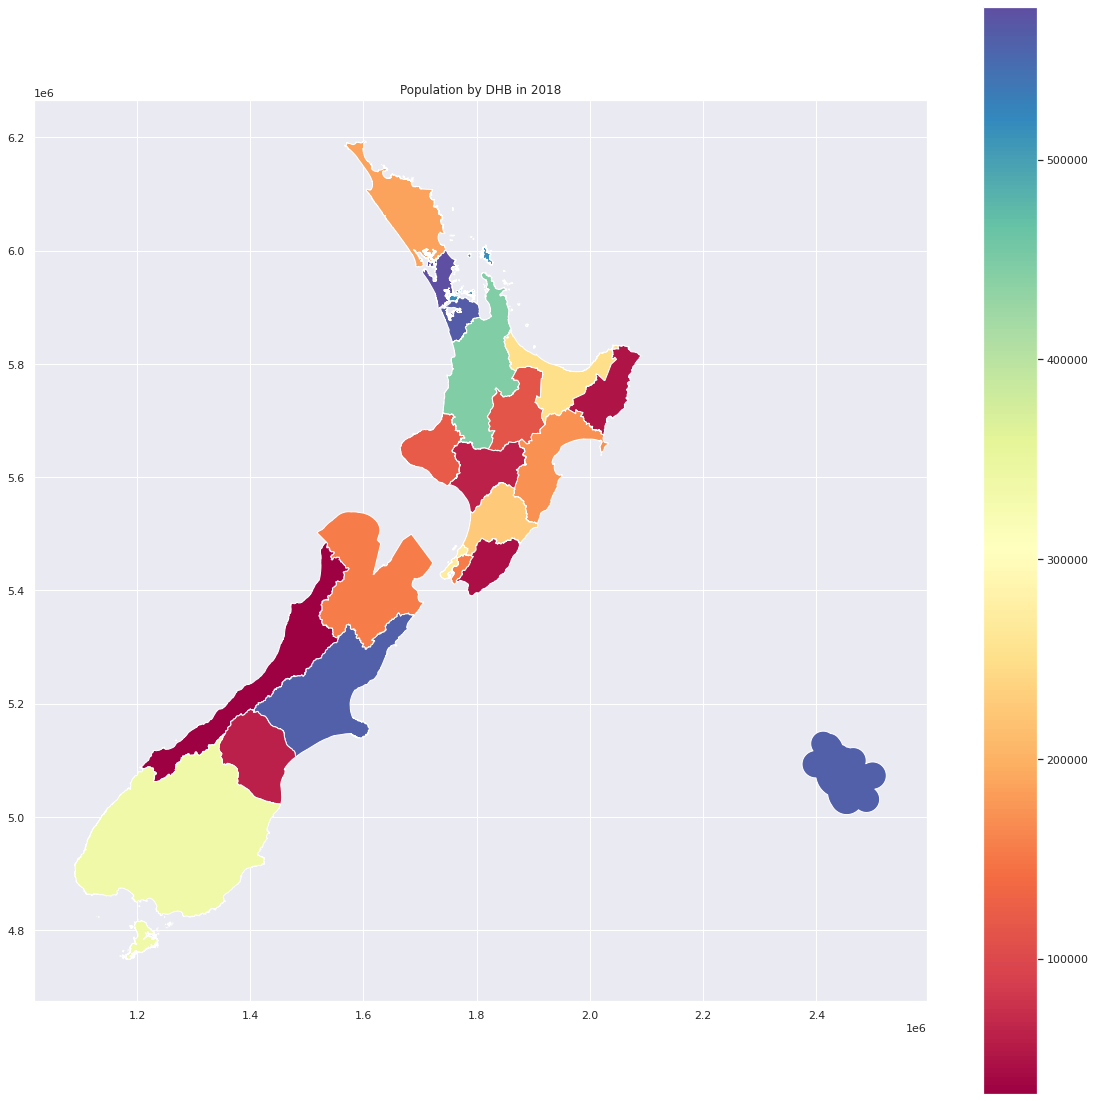

In [ ]:
ax = DHB.plot(column="pop_2018_total", legend=True, cmap="Spectral")
ax.set_title("Population by DHB in 2018")

In [ ]:
for c in ["0-14", "15-39", "40-64", "65+", "total", "median age"]:
    for year in range(2014, 2018):
        DHB[f"pop_{year}_{c}"] = np.nan
    DHB.update(DHB[[f"pop_{year}_{c}" for year in range(2013,2019)]].interpolate(axis=1))

In [ ]:
# Load all hospital discharge data from 2013-2019 into one data frame
discharges = []
for f in glob("input/hospital_discharges/*"):
    print(f)
    try:
        df = pd.read_csv(
            zipfile.ZipFile(f).open('PubFund_DischargesAll.txt'), delimiter='|', encoding='Windows-1252'
        )
    except KeyError:
        df = pd.read_csv(
            zipfile.ZipFile(f).open('PubFund_Data/PubFund_DischargesAll.txt'), delimiter='|', encoding='Windows-1252'
        )
    df.DHB.replace("Midcentral", "MidCentral", inplace=True)
    discharges.append(df)
discharges = pd.concat(discharges)
discharges

input/hospital_discharges/pubfund2016_17data.zip
input/hospital_discharges/pubfund2015_16data.zip
input/hospital_discharges/publicly-funded-discharges-2013-14-data.zip
input/hospital_discharges/publicly-funded-discharges-2014-15-data.zip
input/hospital_discharges/publicly-funded-hospital-data-2017-2018.zip
input/hospital_discharges/publicly-funded-hospital-data-2018-2019.zip


,FinancialYear,DHB,EthnicGroup,Sex,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,ICDChapter,Discharges,ICDThreeCharCode
0,2016/17,Counties Manukau,Pacific,Male,65-69,A00,A00 Cholera,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
1,2016/17,Auckland,Maori,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
2,2016/17,Auckland,Other,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
3,2016/17,Counties Manukau,Pacific,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
4,2016/17,Auckland,Maori,Male,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
409504,20182019,Wairarapa,Other,Male,55-59,Z80,Z80 Family history of malignant neoplasm,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409505,20182019,Waikato,Other,Male,60-64,Z80,Z80 Family history of malignant neoplasm,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409506,20182019,Northland,Maori,Female,00-04,Z82,Z82 Family history of certain disabilities and...,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409507,20182019,Northland,Maori,Male,25-29,Z84,Z84 Family history of other conditions,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN


In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(discharges.sort_values(by="Discharges", ascending=False).head(10))

,FinancialYear,DHB,EthnicGroup,Sex,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,ICDChapter,Discharges,ICDThreeCharCode
344935,2014/15,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2148,NaN
354531,2016/17,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2099,NaN
345001,2014/15,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2086,NaN
364182,2017/18,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2067,NaN
354593,2016/17,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2034,NaN
339132,2013/14,Waitemata,Other,Male,00-04,NaN,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Z00–Z99 Factors influencing health status and contact with health services,2030,Z38
339066,2013/14,Waitemata,Other,Female,00-04,NaN,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Z00–Z99 Factors influencing health status and contact with health services,2025,Z38
349182,2015/16,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1991,NaN
364244,2017/18,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1982,NaN
349244,2015/16,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1933,NaN


The most common discharge reason appears to be for childbirth

In [ ]:
discharges.groupby("DHB")["Discharges"].sum().sort_values(ascending=False)

DHB
Waitemata             924552
Counties Manukau      786348
Canterbury            737913
Waikato               686812
Auckland              638673
Southern              469828
Capital and Coast     393409
Bay of Plenty         388231
Northland             305592
Hawke's Bay           266436
MidCentral            258823
Hutt Valley           238268
Taranaki              211696
Nelson Marlborough    204635
Lakes                 181994
Whanganui             119105
South Canterbury       99051
Tairawhiti             75723
Wairarapa              74094
West Coast             56462
Unknown                34050
Name: Discharges, dtype: int64

Waitemata DHB had the most overall discharges from 2013-2019 

In [ ]:
# Looks like there's some variation in how chapters are recorded - let's make it a bit more consistent
chapters = discharges.ICDChapter.unique().tolist()
chapters

['Chapter  1 Certain infectious and parasitic diseases',
 'Chapter  2 Neoplasms',
 'Chapter  3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter  4 Endocrine, nutritional and metabolic diseases',
 'Chapter  5 Mental and behavioural disorders',
 'Chapter  6 Diseases of the nervous system',
 'Chapter  7 Diseases of the eye and adnexa',
 'Chapter  8 Diseases of the ear and mastoid process',
 'Chapter  9 Diseases of the circulatory system',
 'Chapter 10 Diseases of the respiratory system',
 'Chapter 11 Diseases of the digestive system',
 'Chapter 12 Diseases of the skin and subcutaneous tissue',
 'Chapter 13 Diseases of the musculoskeletal system and connective tissue',
 'Chapter 14 Diseases of the genitourinary system',
 'Chapter 15 Pregnancy, childbirth and the puerperium',
 'Chapter 16 Certain conditions originating in the perinatal period',
 'Chapter 17 Congenital malformations, deformations and chromosomal abnormalities',
 'Cha

In [ ]:
target_chapters = chapters[40:49] + chapters[9:20]
target_chapters

['Chapter 1 Certain infectious and parasitic diseases',
 'Chapter 2 Neoplasms',
 'Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter 4 Endocrine, nutritional and metabolic diseases',
 'Chapter 5 Mental and behavioural disorders',
 'Chapter 6 Diseases of the nervous system',
 'Chapter 7 Diseases of the eye and adnexa',
 'Chapter 8 Diseases of the ear and mastoid process',
 'Chapter 9 Diseases of the circulatory system',
 'Chapter 10 Diseases of the respiratory system',
 'Chapter 11 Diseases of the digestive system',
 'Chapter 12 Diseases of the skin and subcutaneous tissue',
 'Chapter 13 Diseases of the musculoskeletal system and connective tissue',
 'Chapter 14 Diseases of the genitourinary system',
 'Chapter 15 Pregnancy, childbirth and the puerperium',
 'Chapter 16 Certain conditions originating in the perinatal period',
 'Chapter 17 Congenital malformations, deformations and chromosomal abnormalities',
 'Chapter 18 S

In [ ]:
replacement_dict = {k: v for k,v in zip(chapters[:9], target_chapters[:9])}
replacement_dict.update({k: v for k,v in zip(chapters[20:40], target_chapters)})
replacement_dict

{'Chapter  1 Certain infectious and parasitic diseases': 'Chapter 1 Certain infectious and parasitic diseases',
 'Chapter  2 Neoplasms': 'Chapter 2 Neoplasms',
 'Chapter  3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism': 'Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter  4 Endocrine, nutritional and metabolic diseases': 'Chapter 4 Endocrine, nutritional and metabolic diseases',
 'Chapter  5 Mental and behavioural disorders': 'Chapter 5 Mental and behavioural disorders',
 'Chapter  6 Diseases of the nervous system': 'Chapter 6 Diseases of the nervous system',
 'Chapter  7 Diseases of the eye and adnexa': 'Chapter 7 Diseases of the eye and adnexa',
 'Chapter  8 Diseases of the ear and mastoid process': 'Chapter 8 Diseases of the ear and mastoid process',
 'Chapter  9 Diseases of the circulatory system': 'Chapter 9 Diseases of the circulatory system',
 'A00–B99 Certain in

In [ ]:
discharges.ICDChapter = discharges.ICDChapter.replace(replacement_dict)
discharges.ICDChapter.value_counts(dropna=False)

Chapter 19 Injury, poisoning and certain other consequences external causes                                  493542
Chapter 11 Diseases of the digestive system                                                                  200696
Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified           182502
Chapter 9 Diseases of the circulatory system                                                                 155399
Chapter 2 Neoplasms                                                                                          144812
Chapter 13 Diseases of the musculoskeletal system and connective tissue                                      143358
Chapter 10 Diseases of the respiratory system                                                                141126
Chapter 14 Diseases of the genitourinary system                                                              119736
Chapter 21 Factors influencing health status and contact with health ser

In [ ]:
discharges["ICDSubgroup"].value_counts(dropna=False).head(20)

S00–S09 Injuries to the head                                                            90762
Z40–Z54 Persons encountering health services for specific procedures and health care    63054
S60–S69 Injuries to the wrist and hand                                                  57905
I30–I52 Other forms of heart disease                                                    45265
R50–R69 General symptoms and signs                                                      44658
S80–S89 Injuries to the knee and lower leg                                              42575
J09–J18 Influenza and pneumonia                                                         37131
L00–L08 Infections of the skin and subcutaneous tissue                                  34612
T80–T88 Complications of surgical and medical care, not elsewhere classified            34321
R00–R09 Symptoms and signs involving the circulatory and respiratory systems            32782
K55–K64 Other diseases of intestines                        

In [ ]:
discharges["ICDThreeChar"].value_counts(dropna=False).head(20)

S06 Intracranial injury                                29367
Z50 Care involving use of rehabilitation procedures    27225
S82 Fracture of lower leg, including ankle             26338
S52 Fracture of forearm                                23616
L03 Cellulitis                                         23534
S62 Fracture at wrist and hand level                   19440
S01 Open wound of head                                 18676
J18 Pneumonia, organism unspecified                    16995
S42 Fracture of shoulder and upper arm                 16777
S09 Other and unspecified injuries of head             15398
R55 Syncope and collapse                               15338
S61 Open wound of wrist and hand                       14453
R10 Abdominal and pelvic pain                          14000
R07 Pain in throat and chest                           13648
S02 Fracture of skull and facial bones                 12906
N39 Other disorders of urinary system                  12753
I21 Acute myocardial inf

Text(0, 0.5, '# discharges')

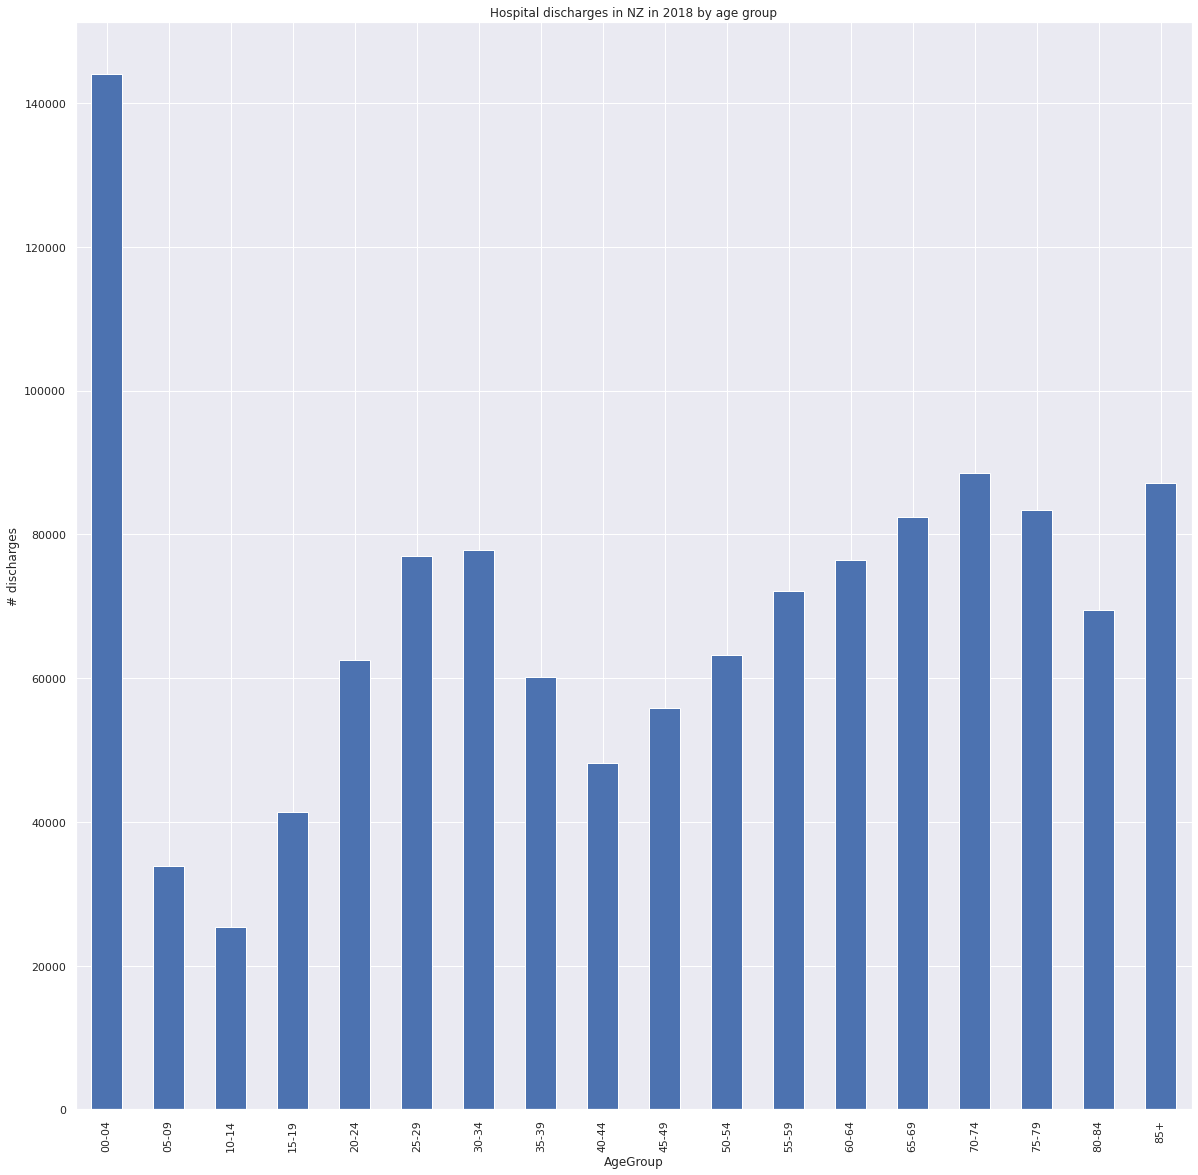

In [ ]:
discharges[discharges.FinancialYear == 20182019].groupby("AgeGroup")["Discharges"].sum().plot.bar()
plt.title("Hospital discharges in NZ in 2018 by age group")
plt.ylabel("# discharges")

In [ ]:
discharges.FinancialYear.value_counts(dropna=False)

20182019    409509
2017/18     377960
2016/17     368295
2015/16     362851
2014/15     358697
2013/14     352666
Name: FinancialYear, dtype: int64

In [ ]:
discharges["year"] = discharges.FinancialYear.astype(str).str.slice(stop=4)
discharges.year.value_counts(dropna=False)

2018    409509
2017    377960
2016    368295
2015    362851
2014    358697
2013    352666
Name: year, dtype: int64

In [ ]:
discharge_years = sorted(discharges.year.unique())
discharge_years

['2013', '2014', '2015', '2016', '2017', '2018']

In [ ]:
# Restructure discharge data so we have one row per DHB, and separate chapter discharge data in columns
rows = []
for d in tqdm(discharges.DHB.unique()):
    row = {"DHB": d}
    discharges_for_dhb = discharges[discharges.DHB == d]
    for year in sorted(discharges.year.unique()):
        discharges_for_year = discharges_for_dhb[discharges_for_dhb.year == year]
        for chapter in target_chapters:
            new_col = f"discharges_{year}_{chapter}"
            value = discharges_for_year.Discharges[discharges_for_year.ICDChapter == chapter].sum()
            row[new_col] = value
    rows.append(row)
discharges = pd.DataFrame(rows)
discharges

  0%|          | 0/21 [00:00<?, ?it/s]

,DHB,discharges_2013_Chapter 1 Certain infectious and parasitic diseases,discharges_2013_Chapter 2 Neoplasms,discharges_2013_Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"discharges_2013_Chapter 4 Endocrine, nutritional and metabolic diseases",discharges_2013_Chapter 5 Mental and behavioural disorders,discharges_2013_Chapter 6 Diseases of the nervous system,discharges_2013_Chapter 7 Diseases of the eye and adnexa,discharges_2013_Chapter 8 Diseases of the ear and mastoid process,discharges_2013_Chapter 9 Diseases of the circulatory system,...,discharges_2018_Chapter 11 Diseases of the digestive system,discharges_2018_Chapter 12 Diseases of the skin and subcutaneous tissue,discharges_2018_Chapter 13 Diseases of the musculoskeletal system and connective tissue,discharges_2018_Chapter 14 Diseases of the genitourinary system,"discharges_2018_Chapter 15 Pregnancy, childbirth and the puerperium",discharges_2018_Chapter 16 Certain conditions originating in the perinatal period,"discharges_2018_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","discharges_2018_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","discharges_2018_Chapter 19 Injury, poisoning and certain other consequences external causes",discharges_2018_Chapter 21 Factors influencing health status and contact with health services
0,Counties Manukau,4063,7369,1614,3240,2160,2974,2559,1300,7884,...,9194,4086,6683,6970,13383,3514,971,11889,14297,17126
1,Auckland,3520,4967,1047,2243,2284,2354,2614,1198,6093,...,8010,3347,6104,5559,9288,1466,703,10550,13551,13934
2,Hawke's Bay,1223,3068,459,866,810,911,1314,325,3495,...,4635,1168,2903,2335,3548,833,363,5927,5391,3692
3,Waitemata,4589,8449,1825,2649,2845,3212,2569,1419,9970,...,15607,4096,8960,8068,11635,1855,1137,18698,18301,17270
4,MidCentral,1136,3234,511,1083,943,1127,1063,322,3309,...,3766,893,2419,2211,3637,606,290,5018,4628,4500
5,Waikato,2627,7088,1421,2170,2141,3025,2214,975,6557,...,11382,2898,5718,5377,8709,1547,667,14358,13669,17464
6,Whanganui,658,1582,141,409,364,463,264,122,1610,...,2003,511,1289,1167,1350,218,113,2307,2357,1500
7,Hutt Valley,1166,2449,584,763,832,921,665,366,2667,...,4227,1199,2070,1953,3415,639,270,5238,4548,3828
8,Lakes,837,1745,552,550,610,683,632,320,2132,...,3017,694,1561,1495,2623,630,267,3505,3372,2897
9,Canterbury,2773,8920,1340,2169,3353,2772,2133,1044,8365,...,10511,2696,8102,6404,11841,2171,847,9728,14191,17704


In [ ]:
discharges = discharges.set_index("DHB")

In [ ]:
DHB = DHB.merge(discharges, left_on="DHB2015_Name", right_index=True, how="left")
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,discharges_2018_Chapter 11 Diseases of the digestive system,discharges_2018_Chapter 12 Diseases of the skin and subcutaneous tissue,discharges_2018_Chapter 13 Diseases of the musculoskeletal system and connective tissue,discharges_2018_Chapter 14 Diseases of the genitourinary system,"discharges_2018_Chapter 15 Pregnancy, childbirth and the puerperium",discharges_2018_Chapter 16 Certain conditions originating in the perinatal period,"discharges_2018_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","discharges_2018_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","discharges_2018_Chapter 19 Injury, poisoning and certain other consequences external causes",discharges_2018_Chapter 21 Factors influencing health status and contact with health services
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,5980,1206,2265,2182,3516,672,314,6104,5601,5415
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,15607,4096,8960,8068,11635,1855,1137,18698,18301,17270
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,8010,3347,6104,5559,9288,1466,703,10550,13551,13934
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,9194,4086,6683,6970,13383,3514,971,11889,14297,17126
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,11382,2898,5718,5377,8709,1547,667,14358,13669,17464
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,3017,694,1561,1495,2623,630,267,3505,3372,2897
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,7557,1412,3660,3133,4739,1006,433,7426,7540,6003
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,1274,446,623,673,903,179,119,1376,1424,1693
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,3465,913,2694,1661,2626,622,178,5475,4076,3601
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,4635,1168,2903,2335,3548,833,363,5927,5391,3692


In [ ]:
header = []
for k in ["Total households", "median", "<$20K", "$20K-$30K", "$30K-$50K",
            "$50K-$70K", "$70K-$100K", "$100K-$150K", ">$150K", "Total households stated", "Not stated"]:
    header.append("income_2013_" + k)
    header.append("income_2018_" + k)
header = ["area"] + header
income = pd.read_excel("input/total_household_income_2013_2018_census_by_DHB.xlsx",
                        skiprows=5,
                        names=header,
                        usecols="A,C:X",
                        index_col=0,
                        nrows=20)
income[income.columns[income.columns!="area"]]
income

,income_2013_Total households,income_2018_Total households,income_2013_median,income_2018_median,income_2013_<$20K,income_2018_<$20K,income_2013_$20K-$30K,income_2018_$20K-$30K,income_2013_$30K-$50K,income_2018_$30K-$50K,...,income_2013_$70K-$100K,income_2018_$70K-$100K,income_2013_$100K-$150K,income_2018_$100K-$150K,income_2013_>$150K,income_2018_>$150K,income_2013_Total households stated,income_2018_Total households stated,income_2013_Not stated,income_2018_Not stated
area,,,,,,,,,,,,,,,,,,,,,
Northland,58944,64251,46900,57000,7623,7248,7131,7617,10395,10995,...,7545,8895,4929,8919,2772,5679,47625,58182,11322,6069
Waitemata,181143,193440,75800,94000,13437,12399,13971,13482,23754,21171,...,28158,26706,29928,38730,24771,44724,154764,177660,26376,15780
Auckland,153363,159009,80100,97900,14766,13647,9990,9948,16998,15324,...,20529,19746,22134,27447,28845,43782,129141,145278,24222,13734
Counties Manukau,140523,150702,73500,90100,11328,11289,9774,9987,17217,16431,...,21465,21345,21651,30867,15852,30552,112914,136875,27609,13830
Waikato,133578,144243,58900,68500,13656,12924,13401,14115,21609,21543,...,20580,21690,16398,24915,10473,18555,113349,133143,20229,11100
Lakes,37086,38886,55900,65500,3756,3297,3732,3849,6111,5907,...,5589,6090,4014,6222,2127,3975,30243,34812,6840,4074
Bay of Plenty,79299,87105,54600,67200,7980,6804,8769,9201,14274,13821,...,11724,12789,8922,14688,5040,10887,67164,79737,12135,7368
Tairawhiti,15993,16410,50500,57900,1950,1812,1755,1947,2661,2712,...,2241,2412,1413,2334,732,1350,12852,14928,3141,1482
Taranaki,43080,45306,58400,63500,4377,4329,4545,5076,6939,7353,...,6531,6888,5088,7230,3486,5148,36600,42324,6480,2982


<AxesSubplot:xlabel='area'>

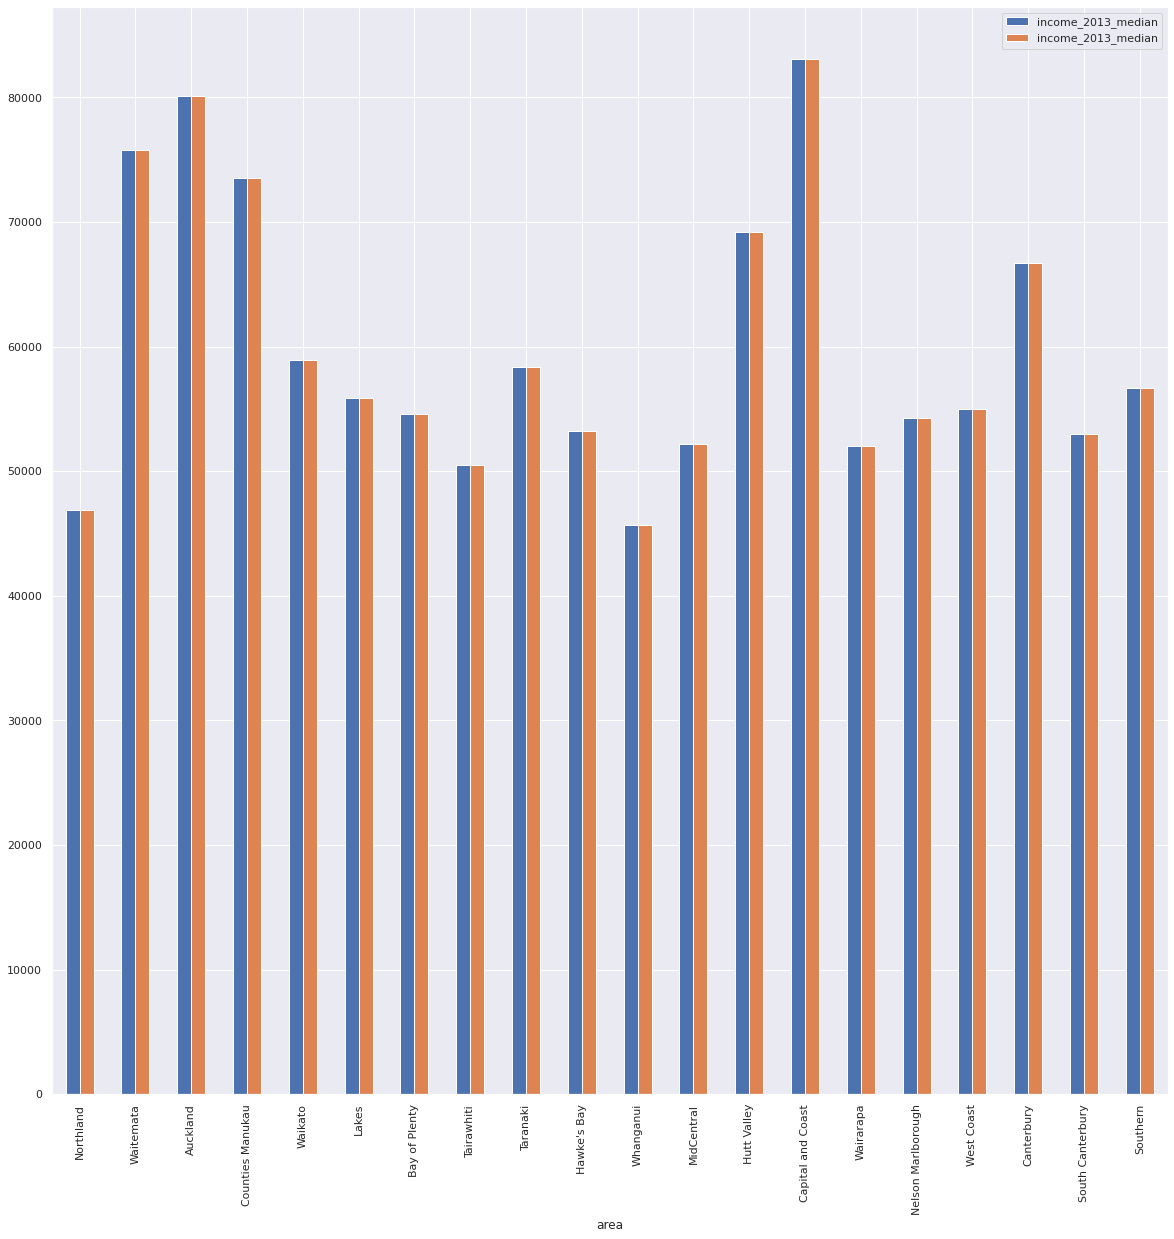

In [ ]:
income[["income_2013_median", "income_2013_median"]].plot(kind="bar")

In [ ]:
DHB = DHB.merge(income, left_on="DHB2015_Name", right_index=True, how="left")
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,income_2013_$70K-$100K,income_2018_$70K-$100K,income_2013_$100K-$150K,income_2018_$100K-$150K,income_2013_>$150K,income_2018_>$150K,income_2013_Total households stated,income_2018_Total households stated,income_2013_Not stated,income_2018_Not stated
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,7545,8895,4929,8919,2772,5679,47625,58182,11322,6069
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,28158,26706,29928,38730,24771,44724,154764,177660,26376,15780
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,20529,19746,22134,27447,28845,43782,129141,145278,24222,13734
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,21465,21345,21651,30867,15852,30552,112914,136875,27609,13830
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,20580,21690,16398,24915,10473,18555,113349,133143,20229,11100
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,5589,6090,4014,6222,2127,3975,30243,34812,6840,4074
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,11724,12789,8922,14688,5040,10887,67164,79737,12135,7368
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,2241,2412,1413,2334,732,1350,12852,14928,3141,1482
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,6531,6888,5088,7230,3486,5148,36600,42324,6480,2982
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,8745,9366,5964,9639,3102,6003,48687,55764,8919,4440


In [ ]:
print(DHB.columns.tolist())

['DHB2015_Code', 'DHB2015_Name', 'Shape_Length', 'geometry', 'TALBs', 'pop_1996_0-14', 'pop_1996_15-39', 'pop_1996_40-64', 'pop_1996_65+', 'pop_1996_total', 'pop_1996_median age', 'pop_2001_0-14', 'pop_2001_15-39', 'pop_2001_40-64', 'pop_2001_65+', 'pop_2001_total', 'pop_2001_median age', 'pop_2006_0-14', 'pop_2006_15-39', 'pop_2006_40-64', 'pop_2006_65+', 'pop_2006_total', 'pop_2006_median age', 'pop_2013_0-14', 'pop_2013_15-39', 'pop_2013_40-64', 'pop_2013_65+', 'pop_2013_total', 'pop_2013_median age', 'pop_2018_0-14', 'pop_2018_15-39', 'pop_2018_40-64', 'pop_2018_65+', 'pop_2018_total', 'pop_2018_median age', 'pop_2023_0-14', 'pop_2023_15-39', 'pop_2023_40-64', 'pop_2023_65+', 'pop_2023_total', 'pop_2023_median age', 'pop_2028_0-14', 'pop_2028_15-39', 'pop_2028_40-64', 'pop_2028_65+', 'pop_2028_total', 'pop_2028_median age', 'pop_2033_0-14', 'pop_2033_15-39', 'pop_2033_40-64', 'pop_2033_65+', 'pop_2033_total', 'pop_2033_median age', 'pop_2038_0-14', 'pop_2038_15-39', 'pop_2038_40-64

In [ ]:
DHB.drop(columns="geometry").to_csv("output/DHBs.csv", index=False)

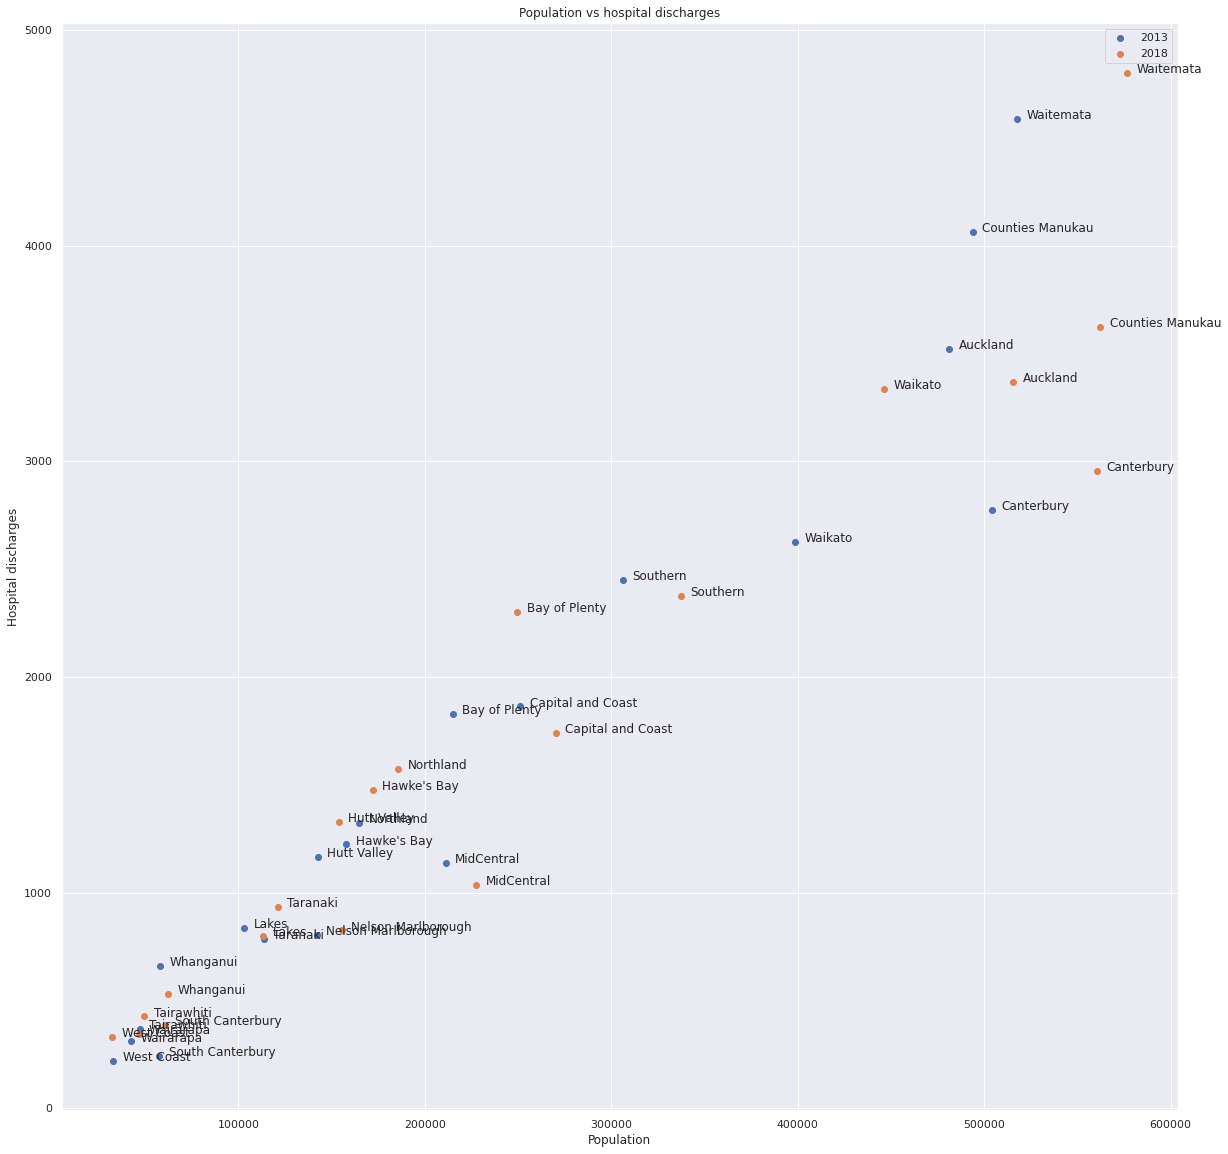

In [ ]:
plt.scatter(DHB.pop_2013_total, DHB["discharges_2013_Chapter 1 Certain infectious and parasitic diseases"], label="2013")
plt.scatter(DHB.pop_2018_total, DHB["discharges_2018_Chapter 1 Certain infectious and parasitic diseases"], label="2018")
for i, d in DHB.iterrows():
    plt.text(d.pop_2013_total + 5e3, d["discharges_2013_Chapter 1 Certain infectious and parasitic diseases"], d.DHB2015_Name)
    plt.text(d.pop_2018_total + 5e3, d["discharges_2018_Chapter 1 Certain infectious and parasitic diseases"], d.DHB2015_Name)
plt.xlabel("Population")
plt.ylabel("Hospital discharges")
plt.title("Population vs hospital discharges")
plt.legend()

This looks pretty linearly correlated, so a linear model should be able to predict this nicely

# Train some models

In [ ]:
def get_data_for_year(year, total_pop_only = False, include_DHB_code = True, income=None, per_1K=False):
    year = str(year)
    x_cols = []
    if include_DHB_code:
        x_cols.append("DHB2015_Code")
    if total_pop_only:
        x_cols.append(f"pop_{year}_total")
    else:
        x_cols.extend(list(DHB.columns[DHB.columns.str.contains(f"pop_{year}")]))
    if income == "median":
        x_cols.append(f"income_{year}_median")
    elif income == "all":
        x_cols.extend([c for c in DHB.columns if c.startswith(f"income_{year}") and ("median" in c or "$" in c)])
    y_cols = list(DHB.columns[DHB.columns.str.contains(f"discharges_{year}")])
    x = DHB[x_cols].astype(float)
    x.columns = x.columns.map(lambda c: c.replace(year, "") if c!="DHB2015_Code" else c)
    x.index = DHB.DHB2015_Name
    if per_1K:
        x = x.divide(x["pop__total"], axis="columns") * 1000
    if y_cols:
        y = DHB[y_cols]
        y.columns = target_chapters
        y.index = DHB.DHB2015_Name
        if per_1K:
            y = y.divide(x["pop__total"], axis="columns") * 1000
    else:
        y = "?"
    return x,y

x_train, y_train = get_data_for_year(2013)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
x_test, y_test = get_data_for_year(2018)
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")
x_train2 = pd.concat([x_train, x_test])
y_train2 = pd.concat((y_train, y_test))
print(f"x_train2 shape: {x_train2.shape}, y_train2 shape: {y_train2.shape}")

data = [get_data_for_year(year) for year in discharge_years]
x_train3 = pd.concat([x for x,y in data])
y_train3 = pd.concat([y for x,y in data])
print(f"x_train3 shape: {x_train3.shape}, y_train3 shape: {y_train3.shape}")

x_train shape: (20, 7), y_train shape: (20, 20)
x_test shape: (20, 7), y_test shape: (20, 20)
x_train2 shape: (40, 7), y_train2 shape: (40, 20)
x_train3 shape: (120, 7), y_train3 shape: (120, 20)


In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(x_train3, y_train3)
model.score(x_test, y_test)

0.9446610802252728

In [ ]:
for chapter in target_chapters:
    model = sm.OLS(y_train3[chapter], sm.add_constant(x_train3)).fit()
    display(model.summary(alpha=.05))
    print("95% confidence interval:")
    display(pd.DataFrame(
        model.get_prediction(
            sm.add_constant(x_test)
        ).conf_int(alpha = .05),
        columns=["low", "high"],
        index=x_train.index
    ))

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Chapter 1 Certain infectious and parasitic diseases   R-squared:                       0.950
Model:                                                             OLS   Adj. R-squared:                  0.947
Method:                                                  Least Squares   F-statistic:                     304.2
Date:                                                 Fri, 27 May 2022   Prob (F-statistic):           9.09e-70
Time:                                                         13:20:19   Log-Likelihood:                -845.34
No. Observations:                                                  120   AIC:                             1707.
Df Residuals:                                                      112   BIC:                             1729.
Df Model:                                                            7                                         
Covariance Type:                                             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1469.1359    594.215      2.472      0.015     291.774    2646.498
DHB2015_Code      -22.7890      5.750     -3.964      0.000     -34.181     -11.397
pop__0-14           0.1529      0.299      0.512      0.610      -0.439       0.745
pop__15-39          0.1471      0.300      0.490      0.625      -0.447       0.741
pop__40-64          0.1708      0.301      0.567      0.572      -0.426       0.768
pop__65+            0.1425      0.300      0.476      0.635      -0.451       0.736
pop__total         -0.1488      0.300     -0.496      0.621      -0.744       0.446
pop__median age   -26.9947     15.075     -1.791      0.076     -56.863       2.874
==============================================================================
Omnibus:                        1.582   Durbin-Watson:                   2.510
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                1.118
Skew:                           0.088   Prob(JB):                        0.572
Kurtosis:                       3.439   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,1312.080809,1702.410566
Waitemata,3957.850396,4240.950864
Auckland,3170.249612,3703.431716
Counties Manukau,3709.946065,4282.294091
Waikato,2836.245828,3201.775734
Lakes,912.309249,1092.683520
Bay of Plenty,1609.577162,1925.034213
Tairawhiti,479.604634,741.916488
Taranaki,904.101569,1062.352316


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Chapter 2 Neoplasms   R-squared:                       0.971
Model:                             OLS   Adj. R-squared:                  0.969
Method:                  Least Squares   F-statistic:                     538.3
Date:                 Fri, 27 May 2022   Prob (F-statistic):           4.28e-83
Time:                         13:20:19   Log-Likelihood:                -901.28
No. Observations:                  120   AIC:                             1819.
Df Residuals:                      112   BIC:                             1841.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -978.4473    947.048     -1.033      0.304   -2854.901     898.006
DHB2015_Code      -41.2651      9.164     -4.503      0.000     -59.422     -23.109
pop__0-14          -1.7210      0.476     -3.613      0.000      -2.665      -0.777
pop__15-39         -1.7961      0.478     -3.759      0.000      -2.743      -0.849
pop__40-64         -1.6486      0.480     -3.432      0.001      -2.600      -0.697
pop__65+           -1.7681      0.478     -3.702      0.000      -2.714      -0.822
pop__total          1.7462      0.478      3.650      0.000       0.798       2.694
pop__median age    34.8853     24.026      1.452      0.149     -12.718      82.489
==============================================================================
Omnibus:                       21.139   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.519
Skew:                           0.774   Prob(JB):                     7.13e-09
Kurtosis:                       5.260   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,3464.584502,4086.683583
Waitemata,9012.841639,9464.041009
Auckland,4789.921112,5639.695158
Counties Manukau,6245.813773,7158.009614
Waikato,6837.477314,7420.050931
Lakes,1928.514591,2215.991183
Bay of Plenty,4050.618737,4553.387326
Tairawhiti,640.306299,1058.373230
Taranaki,2113.017444,2365.234043


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                        OLS Regression Results                                                                       
=====================================================================================================================================================================
Dep. Variable:     Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism   R-squared:                       0.842
Model:                                                                                                                   OLS   Adj. R-squared:                  0.832
Method:                                                                                                        Least Squares   F-statistic:                     85.05
Date:                                                                                                       Fri, 27 May 2022   Prob (F-statistic):           7.51e-42
Time:                                                                                                               13:20:19   Log-Likelihood:                -843.36
No. Observations:                                                                                                        120   AIC:                             1703.
Df Residuals:                                                                                                            112   BIC:                             1725.
Df Model:                                                                                                                  7                                         
Covariance Type:                                                                                                   nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             684.7848    584.487      1.172      0.244    -473.301    1842.870
DHB2015_Code      -16.4897      5.656     -2.916      0.004     -27.695      -5.284
pop__0-14          -0.9724      0.294     -3.308      0.001      -1.555      -0.390
pop__15-39         -0.9846      0.295     -3.339      0.001      -1.569      -0.400
pop__40-64         -0.9344      0.296     -3.152      0.002      -1.522      -0.347
pop__65+           -0.9648      0.295     -3.273      0.001      -1.549      -0.381
pop__total          0.9672      0.295      3.276      0.001       0.382       1.552
pop__median age   -13.2937     14.828     -0.897      0.372     -42.673      16.086
==============================================================================
Omnibus:                        2.901   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.936
Skew:                           0.046   Prob(JB):                        0.230
Kurtosis:                       3.761   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,741.930631,1125.869839
Waitemata,2170.948278,2449.413773
Auckland,976.695325,1501.148077
Counties Manukau,795.592979,1358.570420
Waikato,1604.801919,1964.347303
Lakes,466.461187,643.882338
Bay of Plenty,1009.595003,1319.887333
Tairawhiti,140.722560,398.739798
Taranaki,521.714754,677.374591


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                              
===================================================================================================================
Dep. Variable:     Chapter 4 Endocrine, nutritional and metabolic diseases   R-squared:                       0.870
Model:                                                                 OLS   Adj. R-squared:                  0.862
Method:                                                      Least Squares   F-statistic:                     106.8
Date:                                                     Fri, 27 May 2022   Prob (F-statistic):           1.47e-46
Time:                                                             13:20:19   Log-Likelihood:                -819.09
No. Observations:                                                      120   AIC:                             1654.
Df Residuals:                                                          112   BIC:                             1676.
Df Model:                                                                7                                         
Covariance Type:                                                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             754.3930    477.453      1.580      0.117    -191.619    1700.405
DHB2015_Code        0.0513      4.620      0.011      0.991      -9.102       9.205
pop__0-14          -0.4206      0.240     -1.751      0.083      -0.896       0.055
pop__15-39         -0.4429      0.241     -1.838      0.069      -0.920       0.034
pop__40-64         -0.4292      0.242     -1.772      0.079      -0.909       0.051
pop__65+           -0.4395      0.241     -1.825      0.071      -0.917       0.038
pop__total          0.4369      0.241      1.811      0.073      -0.041       0.915
pop__median age   -16.4861     12.112     -1.361      0.176     -40.485       7.513
==============================================================================
Omnibus:                       67.906   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.573
Skew:                           2.003   Prob(JB):                     4.85e-64
Kurtosis:                       9.501   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,508.167085,821.797792
Waitemata,1863.840193,2091.311961
Auckland,1109.456583,1537.869425
Counties Manukau,1763.289116,2223.171851
Waikato,1504.077758,1797.781737
Lakes,456.269038,601.200111
Bay of Plenty,799.985542,1053.455886
Tairawhiti,243.453147,454.221225
Taranaki,483.987372,611.142150


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     Chapter 5 Mental and behavioural disorders   R-squared:                       0.926
Model:                                                    OLS   Adj. R-squared:                  0.921
Method:                                         Least Squares   F-statistic:                     200.1
Date:                                        Fri, 27 May 2022   Prob (F-statistic):           3.11e-60
Time:                                                13:20:19   Log-Likelihood:                -848.97
No. Observations:                                         120   AIC:                             1714.
Df Residuals:                                             112   BIC:                             1736.
Df Model:                                                   7                                         
Covariance Type:                                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2572.5501    612.439      4.200      0.000    1359.080    3786.020
DHB2015_Code       19.1702      5.926      3.235      0.002       7.429      30.912
pop__0-14          -0.1102      0.308     -0.358      0.721      -0.721       0.500
pop__15-39         -0.0876      0.309     -0.284      0.777      -0.700       0.525
pop__40-64         -0.0488      0.311     -0.157      0.875      -0.664       0.567
pop__65+           -0.0675      0.309     -0.219      0.827      -0.679       0.544
pop__total          0.0826      0.309      0.267      0.790      -0.530       0.695
pop__median age   -68.2068     15.537     -4.390      0.000     -98.991     -37.422
==============================================================================
Omnibus:                       24.772   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.946
Skew:                           1.024   Prob(JB):                     1.56e-08
Kurtosis:                       4.730   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,745.263435,1147.564036
Waitemata,3233.596358,3525.379104
Auckland,2692.738261,3242.272281
Counties Manukau,2134.764208,2724.665312
Waikato,2246.704312,2623.444486
Lakes,597.171921,783.078007
Bay of Plenty,1485.502189,1810.633846
Tairawhiti,331.513800,601.870375
Taranaki,759.500941,922.605006


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Chapter 6 Diseases of the nervous system   R-squared:                       0.953
Model:                                                  OLS   Adj. R-squared:                  0.950
Method:                                       Least Squares   F-statistic:                     322.9
Date:                                      Fri, 27 May 2022   Prob (F-statistic):           3.77e-71
Time:                                              13:20:19   Log-Likelihood:                -830.28
No. Observations:                                       120   AIC:                             1677.
Df Residuals:                                           112   BIC:                             1699.
Df Model:                                                 7                                         
Covariance Type:                                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             854.1273    524.134      1.630      0.106    -184.377    1892.632
DHB2015_Code       25.8992      5.072      5.107      0.000      15.851      35.948
pop__0-14          -1.6259      0.264     -6.167      0.000      -2.148      -1.104
pop__15-39         -1.6439      0.264     -6.216      0.000      -2.168      -1.120
pop__40-64         -1.6467      0.266     -6.194      0.000      -2.173      -1.120
pop__65+           -1.6139      0.264     -6.106      0.000      -2.138      -1.090
pop__total          1.6440      0.265      6.210      0.000       1.119       2.169
pop__median age   -30.5009     13.297     -2.294      0.024     -56.847      -4.155
==============================================================================
Omnibus:                        8.247   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               16.957
Skew:                           0.028   Prob(JB):                     0.000208
Kurtosis:                       4.841   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,687.630826,1031.925338
Waitemata,3513.473283,3763.185061
Auckland,2677.101452,3147.400397
Counties Manukau,2791.167392,3296.013055
Waikato,3111.894468,3434.314008
Lakes,630.904383,790.005427
Bay of Plenty,1675.735870,1953.988115
Tairawhiti,222.646664,454.021624
Taranaki,777.677985,917.264738


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Chapter 7 Diseases of the eye and adnexa   R-squared:                       0.883
Model:                                                  OLS   Adj. R-squared:                  0.876
Method:                                       Least Squares   F-statistic:                     121.0
Date:                                      Fri, 27 May 2022   Prob (F-statistic):           3.32e-49
Time:                                              13:20:19   Log-Likelihood:                -903.81
No. Observations:                                       120   AIC:                             1824.
Df Residuals:                                           112   BIC:                             1846.
Df Model:                                                 7                                         
Covariance Type:                                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             660.8359    967.268      0.683      0.496   -1255.682    2577.354
DHB2015_Code      -10.0482      9.359     -1.074      0.285     -28.592       8.496
pop__0-14           0.2541      0.487      0.522      0.603      -0.710       1.218
pop__15-39          0.2828      0.488      0.579      0.563      -0.684       1.250
pop__40-64          0.2007      0.491      0.409      0.683      -0.771       1.173
pop__65+            0.3293      0.488      0.675      0.501      -0.637       1.296
pop__total         -0.2506      0.489     -0.513      0.609      -1.219       0.717
pop__median age   -12.5983     24.539     -0.513      0.609     -61.218      36.022
==============================================================================
Omnibus:                       14.656   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.579
Skew:                           0.454   Prob(JB):                     2.29e-07
Kurtosis:                       5.301   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,1367.839286,2003.220826
Waitemata,3720.496693,4181.329637
Auckland,4013.628421,4881.546022
Counties Manukau,3611.823811,4543.495977
Waikato,3446.762819,4041.774984
Lakes,806.794786,1100.409301
Bay of Plenty,2180.847555,2694.350773
Tairawhiti,250.098317,677.091409
Taranaki,855.440431,1113.042115


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                           
=============================================================================================================
Dep. Variable:     Chapter 8 Diseases of the ear and mastoid process   R-squared:                       0.976
Model:                                                           OLS   Adj. R-squared:                  0.974
Method:                                                Least Squares   F-statistic:                     642.9
Date:                                               Fri, 27 May 2022   Prob (F-statistic):           2.70e-87
Time:                                                       13:20:19   Log-Likelihood:                -676.18
No. Observations:                                                120   AIC:                             1368.
Df Residuals:                                                    112   BIC:                             1391.
Df Model:                                                          7                                         
Covariance Type:                                           nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              39.0496    145.123      0.269      0.788    -248.494     326.593
DHB2015_Code       -7.8210      1.404     -5.570      0.000     -10.603      -5.039
pop__0-14          -0.2126      0.073     -2.912      0.004      -0.357      -0.068
pop__15-39         -0.2137      0.073     -2.919      0.004      -0.359      -0.069
pop__40-64         -0.2074      0.074     -2.818      0.006      -0.353      -0.062
pop__65+           -0.2188      0.073     -2.991      0.003      -0.364      -0.074
pop__total          0.2146      0.073      2.927      0.004       0.069       0.360
pop__median age     1.6118      3.682      0.438      0.662      -5.683       8.906
==============================================================================
Omnibus:                        5.837   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                7.356
Skew:                          -0.238   Prob(JB):                       0.0253
Kurtosis:                       4.116   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,408.319285,503.648265
Waitemata,1419.299133,1488.439849
Auckland,1212.981236,1343.198586
Counties Manukau,1239.214313,1378.997030
Waikato,1011.208424,1100.480617
Lakes,288.070395,332.122623
Bay of Plenty,506.944367,583.987428
Tairawhiti,116.169507,180.233087
Taranaki,281.668687,320.317757


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Chapter 9 Diseases of the circulatory system   R-squared:                       0.968
Model:                                                      OLS   Adj. R-squared:                  0.966
Method:                                           Least Squares   F-statistic:                     489.8
Date:                                          Fri, 27 May 2022   Prob (F-statistic):           7.19e-81
Time:                                                  13:20:19   Log-Likelihood:                -912.60
No. Observations:                                           120   AIC:                             1841.
Df Residuals:                                               112   BIC:                             1863.
Df Model:                                                     7                                         
Covariance Type:                                      nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3119.2399   1040.754      2.997      0.003    1057.119    5181.360
DHB2015_Code      -17.1531     10.070     -1.703      0.091     -37.106       2.800
pop__0-14           0.5996      0.524      1.145      0.255      -0.438       1.637
pop__15-39          0.5590      0.525      1.064      0.289      -0.481       1.599
pop__40-64          0.6698      0.528      1.269      0.207      -0.376       1.716
pop__65+            0.6055      0.525      1.154      0.251      -0.434       1.645
pop__total         -0.5931      0.526     -1.128      0.262      -1.635       0.448
pop__median age   -64.6858     26.403     -2.450      0.016    -117.000     -12.372
==============================================================================
Omnibus:                        6.941   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                7.446
Skew:                           0.394   Prob(JB):                       0.0242
Kurtosis:                       3.931   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,3792.369414,4476.022560
Waitemata,9386.725444,9882.569079
Auckland,6005.758144,6939.613728
Counties Manukau,7855.874819,8858.328569
Waikato,7212.016454,7852.233259
Lakes,2286.192035,2602.113216
Bay of Plenty,4753.190664,5305.706071
Tairawhiti,1222.433451,1681.866331
Taranaki,2521.873766,2799.046128


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     Chapter 10 Diseases of the respiratory system   R-squared:                       0.984
Model:                                                       OLS   Adj. R-squared:                  0.983
Method:                                            Least Squares   F-statistic:                     977.1
Date:                                           Fri, 27 May 2022   Prob (F-statistic):           2.91e-97
Time:                                                   13:20:19   Log-Likelihood:                -883.87
No. Observations:                                            120   AIC:                             1784.
Df Residuals:                                                112   BIC:                             1806.
Df Model:                                                      7                                         
Covariance Type:                                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1762.2699    819.196      2.151      0.034     139.138    3385.401
DHB2015_Code      -22.7776      7.927     -2.874      0.005     -38.483      -7.072
pop__0-14           0.0479      0.412      0.116      0.908      -0.769       0.864
pop__15-39         -0.0256      0.413     -0.062      0.951      -0.845       0.793
pop__40-64         -0.0610      0.416     -0.147      0.884      -0.884       0.762
pop__65+            0.0095      0.413      0.023      0.982      -0.809       0.828
pop__total          0.0340      0.414      0.082      0.935      -0.786       0.854
pop__median age   -31.7112     20.782     -1.526      0.130     -72.888       9.466
==============================================================================
Omnibus:                        5.482   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                5.220
Skew:                          -0.372   Prob(JB):                       0.0735
Kurtosis:                       3.701   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,3605.535359,4143.650816
Waitemata,9643.466512,10033.753788
Auckland,7418.280728,8153.334939
Counties Manukau,10679.428164,11468.477202
Waikato,8346.754170,8850.680116
Lakes,2367.933150,2616.600287
Bay of Plenty,4790.118489,5225.013118
Tairawhiti,1225.995613,1587.623341
Taranaki,2407.083224,2625.250482


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Chapter 11 Diseases of the digestive system   R-squared:                       0.943
Model:                                                     OLS   Adj. R-squared:                  0.939
Method:                                          Least Squares   F-statistic:                     264.3
Date:                                         Fri, 27 May 2022   Prob (F-statistic):           1.54e-66
Time:                                                 13:20:19   Log-Likelihood:                -976.27
No. Observations:                                          120   AIC:                             1969.
Df Residuals:                                              112   BIC:                             1991.
Df Model:                                                    7                                         
Covariance Type:                                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4090.2353   1769.284      2.312      0.023     584.625    7595.846
DHB2015_Code      -79.6602     17.120     -4.653      0.000    -113.581     -45.740
pop__0-14          -1.7614      0.890     -1.979      0.050      -3.525       0.002
pop__15-39         -1.8129      0.893     -2.031      0.045      -3.582      -0.044
pop__40-64         -1.6974      0.897     -1.891      0.061      -3.476       0.081
pop__65+           -1.7331      0.892     -1.943      0.055      -3.501       0.035
pop__total          1.7742      0.894      1.985      0.050       0.004       3.545
pop__median age   -72.2941     44.885     -1.611      0.110    -161.228      16.640
==============================================================================
Omnibus:                       17.214   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.123
Skew:                           0.555   Prob(JB):                     1.43e-08
Kurtosis:                       5.448   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,4725.197316,5887.409449
Waitemata,11825.877283,12668.812755
Auckland,7668.314790,9255.871719
Counties Manukau,8677.839663,10382.013654
Waikato,9389.028475,10477.398714
Lakes,2991.763866,3528.830698
Bay of Plenty,5965.987595,6905.265230
Tairawhiti,1478.065816,2259.102911
Taranaki,3112.141730,3583.335468


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                              
===================================================================================================================
Dep. Variable:     Chapter 12 Diseases of the skin and subcutaneous tissue   R-squared:                       0.978
Model:                                                                 OLS   Adj. R-squared:                  0.977
Method:                                                      Least Squares   F-statistic:                     716.9
Date:                                                     Fri, 27 May 2022   Prob (F-statistic):           7.04e-90
Time:                                                             13:20:19   Log-Likelihood:                -787.56
No. Observations:                                                      120   AIC:                             1591.
Df Residuals:                                                          112   BIC:                             1613.
Df Model:                                                                7                                         
Covariance Type:                                                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -154.8181    367.119     -0.422      0.674    -882.217     572.581
DHB2015_Code      -28.3380      3.552     -7.977      0.000     -35.376     -21.300
pop__0-14           0.4174      0.185      2.260      0.026       0.052       0.783
pop__15-39          0.3958      0.185      2.137      0.035       0.029       0.763
pop__40-64          0.3798      0.186      2.039      0.044       0.011       0.749
pop__65+            0.3703      0.185      2.000      0.048       0.003       0.737
pop__total         -0.3859      0.185     -2.081      0.040      -0.753      -0.019
pop__median age    15.9233      9.313      1.710      0.090      -2.530      34.377
==============================================================================
Omnibus:                        9.942   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               17.833
Skew:                          -0.303   Prob(JB):                     0.000134
Kurtosis:                       4.789   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,1223.516662,1464.670730
Waitemata,3473.708219,3648.613740
Auckland,3042.863374,3372.274676
Counties Manukau,4310.496305,4664.105150
Waikato,2629.687046,2855.519235
Lakes,843.620465,955.059545
Bay of Plenty,1262.478646,1457.374755
Tairawhiti,421.049984,583.111855
Taranaki,747.157152,844.927846


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       OLS Regression Results                                                      
===================================================================================================================================
Dep. Variable:     Chapter 13 Diseases of the musculoskeletal system and connective tissue   R-squared:                       0.959
Model:                                                                                 OLS   Adj. R-squared:                  0.956
Method:                                                                      Least Squares   F-statistic:                     372.9
Date:                                                                     Fri, 27 May 2022   Prob (F-statistic):           1.73e-74
Time:                                                                             13:20:19   Log-Likelihood:                -912.66
No. Observations:                                                                      120   AIC:                             1841.
Df Residuals:                                                                          112   BIC:                             1864.
Df Model:                                                                                7                                         
Covariance Type:                                                                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2887.3059   1041.308      2.773      0.007     824.087    4950.525
DHB2015_Code       24.4657     10.076      2.428      0.017       4.502      44.429
pop__0-14           0.5875      0.524      1.122      0.264      -0.450       1.625
pop__15-39          0.5860      0.525      1.115      0.267      -0.455       1.627
pop__40-64          0.7013      0.528      1.328      0.187      -0.345       1.748
pop__65+            0.5766      0.525      1.098      0.275      -0.464       1.617
pop__total         -0.6085      0.526     -1.157      0.250      -1.651       0.434
pop__median age   -73.7645     26.417     -2.792      0.006    -126.106     -21.423
==============================================================================
Omnibus:                        3.289   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                3.250
Skew:                           0.149   Prob(JB):                        0.197
Kurtosis:                       3.749   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,2125.517278,2809.534638
Waitemata,7719.377739,8215.485532
Auckland,5653.914442,6588.267534
Counties Manukau,6419.591539,7422.579343
Waikato,5127.196397,5767.754276
Lakes,1483.548363,1799.637850
Bay of Plenty,3055.371524,3608.181283
Tairawhiti,761.702597,1221.380238
Taranaki,1748.251535,2025.571559


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     Chapter 14 Diseases of the genitourinary system   R-squared:                       0.980
Model:                                                         OLS   Adj. R-squared:                  0.979
Method:                                              Least Squares   F-statistic:                     794.3
Date:                                             Fri, 27 May 2022   Prob (F-statistic):           2.56e-92
Time:                                                     13:20:19   Log-Likelihood:                -857.69
No. Observations:                                              120   AIC:                             1731.
Df Residuals:                                                  112   BIC:                             1754.
Df Model:                                                        7                                         
Covariance Type:                                         nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             271.5338    658.589      0.412      0.681   -1033.376    1576.444
DHB2015_Code      -14.8355      6.373     -2.328      0.022     -27.462      -2.209
pop__0-14           0.7324      0.331      2.211      0.029       0.076       1.389
pop__15-39          0.7083      0.332      2.131      0.035       0.050       1.367
pop__40-64          0.7684      0.334      2.300      0.023       0.106       1.430
pop__65+            0.6767      0.332      2.038      0.044       0.019       1.335
pop__total         -0.7159      0.333     -2.152      0.034      -1.375      -0.057
pop__median age     1.1825     16.708      0.071      0.944     -31.922      34.287
==============================================================================
Omnibus:                       17.296   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.900
Skew:                           0.443   Prob(JB):                     6.54e-11
Kurtosis:                       5.932   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,2283.920200,2716.535909
Waitemata,7075.772645,7389.542495
Auckland,5398.288333,5989.232144
Counties Manukau,6970.898699,7605.251429
Waikato,4911.969139,5317.098332
Lakes,1436.551396,1636.466318
Bay of Plenty,2648.187822,2997.819571
Tairawhiti,640.538379,931.267504
Taranaki,1500.058793,1675.453462


<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Chapter 15 Pregnancy, childbirth and the puerperium   R-squared:                       0.989
Model:                                                             OLS   Adj. R-squared:                  0.988
Method:                                                  Least Squares   F-statistic:                     1408.
Date:                                                 Fri, 27 May 2022   Prob (F-statistic):          5.07e-106
Time:                                                         13:20:19   Log-Likelihood:                -896.99
No. Observations:                                                  120   AIC:                             1810.
Df Residuals:                                                      112   BIC:                             1832.
Df Model:                                                            7                                         
Covariance Type:                                             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -524.5872    913.802     -0.574      0.567   -2335.169    1285.994
DHB2015_Code        8.4295      8.842      0.953      0.342      -9.090      25.949
pop__0-14           0.5424      0.460      1.180      0.241      -0.368       1.453
pop__15-39          0.4521      0.461      0.981      0.329      -0.461       1.366
pop__40-64          0.5567      0.464      1.201      0.232      -0.362       1.475
pop__65+            0.3532      0.461      0.767      0.445      -0.560       1.266
pop__total         -0.4680      0.462     -1.014      0.313      -1.382       0.447
pop__median age     8.9669     23.182      0.387      0.700     -36.966      54.900
==============================================================================
Omnibus:                        1.579   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.149
Skew:                          -0.017   Prob(JB):                        0.563
Kurtosis:                       3.478   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,3035.724456,3635.985033
Waitemata,12249.859751,12685.219973
Auckland,9063.485764,9883.428881
Counties Manukau,13322.783297,14202.956920
Waikato,8402.166232,8964.288868
Lakes,2102.480499,2379.865356
Bay of Plenty,3783.202091,4268.321218
Tairawhiti,799.716120,1203.107002
Taranaki,2208.440448,2451.803099


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                    OLS Regression Results                                                   
=============================================================================================================================
Dep. Variable:     Chapter 16 Certain conditions originating in the perinatal period   R-squared:                       0.960
Model:                                                                           OLS   Adj. R-squared:                  0.958
Method:                                                                Least Squares   F-statistic:                     388.8
Date:                                                               Fri, 27 May 2022   Prob (F-statistic):           1.83e-75
Time:                                                                       13:20:19   Log-Likelihood:                -771.99
No. Observations:                                                                120   AIC:                             1560.
Df Residuals:                                                                    112   BIC:                             1582.
Df Model:                                                                          7                                         
Covariance Type:                                                           nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -194.8729    322.469     -0.604      0.547    -833.804     444.058
DHB2015_Code        7.9895      3.120      2.561      0.012       1.807      14.172
pop__0-14           0.9586      0.162      5.910      0.000       0.637       1.280
pop__15-39          0.9207      0.163      5.659      0.000       0.598       1.243
pop__40-64          0.9107      0.164      5.568      0.000       0.587       1.235
pop__65+            0.9065      0.163      5.575      0.000       0.584       1.229
pop__total         -0.9194      0.163     -5.645      0.000      -1.242      -0.597
pop__median age     3.6277      8.181      0.443      0.658     -12.581      19.837
==============================================================================
Omnibus:                        9.029   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.674
Skew:                           0.513   Prob(JB):                      0.00793
Kurtosis:                       3.939   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,618.732462,830.556869
Waitemata,1911.730697,2065.363843
Auckland,1199.099698,1488.447310
Counties Manukau,3176.659894,3487.262094
Waikato,1576.038925,1774.404933
Lakes,389.793245,487.678872
Bay of Plenty,736.582440,907.774877
Tairawhiti,171.583137,313.934705
Taranaki,401.245519,487.125137


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                           OLS Regression Results                                                          
===========================================================================================================================================
Dep. Variable:     Chapter 17 Congenital malformations, deformations and chromosomal abnormalities   R-squared:                       0.973
Model:                                                                                         OLS   Adj. R-squared:                  0.971
Method:                                                                              Least Squares   F-statistic:                     573.7
Date:                                                                             Fri, 27 May 2022   Prob (F-statistic):           1.34e-84
Time:                                                                                     13:20:19   Log-Likelihood:                -654.01
No. Observations:                                                                              120   AIC:                             1324.
Df Residuals:                                                                                  112   BIC:                             1346.
Df Model:                                                                                        7                                         
Covariance Type:                                                                         nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             326.5203    120.638      2.707      0.008      87.491     565.550
DHB2015_Code       -0.2980      1.167     -0.255      0.799      -2.611       2.015
pop__0-14           0.0988      0.061      1.628      0.106      -0.021       0.219
pop__15-39          0.0892      0.061      1.466      0.146      -0.031       0.210
pop__40-64          0.1073      0.061      1.753      0.082      -0.014       0.229
pop__65+            0.0791      0.061      1.300      0.196      -0.041       0.200
pop__total         -0.0938      0.061     -1.539      0.127      -0.214       0.027
pop__median age    -7.2320      3.060     -2.363      0.020     -13.296      -1.168
==============================================================================
Omnibus:                       23.510   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.988
Skew:                           0.571   Prob(JB):                     1.57e-18
Kurtosis:                       6.885   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,262.851233,342.096453
Waitemata,1040.883895,1098.359295
Auckland,668.551450,776.798726
Counties Manukau,1110.104451,1226.303241
Waikato,654.373193,728.583518
Lakes,211.608072,248.227875
Bay of Plenty,305.516836,369.561309
Tairawhiti,121.522779,174.777650
Taranaki,218.696254,250.824512


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                    OLS Regression Results                                                                    
==============================================================================================================================================================
Dep. Variable:     Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified   R-squared:                       0.897
Model:                                                                                                            OLS   Adj. R-squared:                  0.890
Method:                                                                                                 Least Squares   F-statistic:                     139.0
Date:                                                                                                Fri, 27 May 2022   Prob (F-statistic):           3.50e-52
Time:                                                                                                        13:20:19   Log-Likelihood:                -1046.1
No. Observations:                                                                                                 120   AIC:                             2108.
Df Residuals:                                                                                                     112   BIC:                             2130.
Df Model:                                                                                                           7                                         
Covariance Type:                                                                                            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7274.5592   3165.476      2.298      0.023    1002.575    1.35e+04
DHB2015_Code     -114.0812     30.629     -3.725      0.000    -174.769     -53.393
pop__0-14          -2.5298      1.592     -1.589      0.115      -5.685       0.625
pop__15-39         -2.6004      1.597     -1.628      0.106      -5.765       0.564
pop__40-64         -2.3747      1.606     -1.479      0.142      -5.556       0.807
pop__65+           -2.5863      1.596     -1.620      0.108      -5.749       0.576
pop__total          2.5360      1.599      1.586      0.116      -0.632       5.704
pop__median age  -140.8011     80.305     -1.753      0.082    -299.915      18.313
==============================================================================
Omnibus:                        5.300   Durbin-Watson:                   2.393
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                7.169
Skew:                           0.145   Prob(JB):                       0.0278
Kurtosis:                       4.162   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,4670.521096,6749.866951
Waitemata,14680.086059,16188.205215
Auckland,9294.930328,12135.272317
Counties Manukau,10787.100895,13836.085693
Waikato,10283.644747,12230.878029
Lakes,3441.172179,4402.053295
Bay of Plenty,5867.139517,7547.627099
Tairawhiti,1725.185467,3122.560525
Taranaki,3457.549716,4300.575459


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                         OLS Regression Results                                                        
=======================================================================================================================================
Dep. Variable:     Chapter 19 Injury, poisoning and certain other consequences external causes   R-squared:                       0.976
Model:                                                                                     OLS   Adj. R-squared:                  0.975
Method:                                                                          Least Squares   F-statistic:                     658.6
Date:                                                                         Fri, 27 May 2022   Prob (F-statistic):           7.26e-88
Time:                                                                                 13:20:20   Log-Likelihood:                -963.06
No. Observations:                                                                          120   AIC:                             1942.
Df Residuals:                                                                              112   BIC:                             1964.
Df Model:                                                                                    7                                         
Covariance Type:                                                                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             242.0557   1584.761      0.153      0.879   -2897.945    3382.057
DHB2015_Code      -63.9285     15.334     -4.169      0.000     -94.311     -33.546
pop__0-14          -0.9692      0.797     -1.216      0.227      -2.549       0.610
pop__15-39         -0.9686      0.800     -1.211      0.228      -2.553       0.616
pop__40-64         -0.9013      0.804     -1.121      0.265      -2.494       0.691
pop__65+           -0.9852      0.799     -1.233      0.220      -2.569       0.598
pop__total          0.9764      0.800      1.220      0.225      -0.610       2.562
pop__median age    14.8032     40.204      0.368      0.713     -64.855      94.462
==============================================================================
Omnibus:                        4.655   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                6.334
Skew:                           0.008   Prob(JB):                       0.0421
Kurtosis:                       4.125   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,5042.314033,6083.316048
Waitemata,15843.155383,16598.178928
Auckland,13281.331089,14703.317588
Counties Manukau,13681.640331,15208.081596
Waikato,11556.820889,12531.682173
Lakes,3177.589711,3658.644450
Bay of Plenty,6328.287034,7169.604967
Tairawhiti,1213.385740,1912.966451
Taranaki,3269.426445,3691.478166


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                          OLS Regression Results                                                         
=========================================================================================================================================
Dep. Variable:     Chapter 21 Factors influencing health status and contact with health services   R-squared:                       0.966
Model:                                                                                       OLS   Adj. R-squared:                  0.964
Method:                                                                            Least Squares   F-statistic:                     452.4
Date:                                                                           Fri, 27 May 2022   Prob (F-statistic):           5.26e-79
Time:                                                                                   13:20:20   Log-Likelihood:                -1011.1
No. Observations:                                                                            120   AIC:                             2038.
Df Residuals:                                                                                112   BIC:                             2060.
Df Model:                                                                                      7                                         
Covariance Type:                                                                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8720.1427   2364.838     -3.687      0.000   -1.34e+04   -4034.520
DHB2015_Code       15.1100     22.882      0.660      0.510     -30.228      60.448
pop__0-14          -5.5341      1.190     -4.652      0.000      -7.891      -3.177
pop__15-39         -5.6607      1.193     -4.744      0.000      -8.025      -3.297
pop__40-64         -5.5856      1.200     -4.657      0.000      -7.962      -3.209
pop__65+           -5.7259      1.192     -4.802      0.000      -8.089      -3.363
pop__total          5.6567      1.194      4.736      0.000       3.290       8.023
pop__median age   184.5724     59.994      3.077      0.003      65.703     303.442
==============================================================================
Omnibus:                        4.328   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                3.911
Skew:                           0.436   Prob(JB):                        0.141
Kurtosis:                       3.147   Cond. No.                     7.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,3672.434389,5225.855239
Waitemata,18232.068364,19358.741800
Auckland,13356.898727,15478.838402
Counties Manukau,15867.233754,18145.044608
Waikato,13698.670201,15153.393460
Lakes,2271.132466,2988.979743
Bay of Plenty,5729.217354,6984.662398
Tairawhiti,-429.579442,614.360192
Taranaki,2588.085708,3217.886548


In [ ]:
# Print linear regression equations for each chapter
for chapter in target_chapters:
    model = sklearn.linear_model.LinearRegression()
    print(chapter)
    model.fit(x_train, y_train[chapter])
    print(f"Score: {model.score(x_test, y_test[chapter])}")
    expression = ' + '.join(f"{coefficient}*{feature}" for coefficient, feature in zip(model.coef_.round(2), x_train.columns))
    print(f"y = {expression} + {model.intercept_.round(2)}\n")

Chapter 1 Certain infectious and parasitic diseases
Score: 0.9025560780558586
y = 0.01*pop__total + -7.78

Chapter 2 Neoplasms
Score: 0.8326812587242497
y = 0.01*pop__total + 546.86

Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism
Score: 0.5402291035215788
y = 0.0*pop__total + 63.78

Chapter 4 Endocrine, nutritional and metabolic diseases
Score: -0.16000196148165857
y = 0.01*pop__total + 53.51

Chapter 5 Mental and behavioural disorders
Score: 0.8347840917565017
y = 0.01*pop__total + 131.12

Chapter 6 Diseases of the nervous system
Score: 0.8593614604944657
y = 0.01*pop__total + 93.73

Chapter 7 Diseases of the eye and adnexa
Score: 0.6158099957233307
y = 0.0*pop__total + 165.8

Chapter 8 Diseases of the ear and mastoid process
Score: 0.9381735803474871
y = 0.0*pop__total + -23.08

Chapter 9 Diseases of the circulatory system
Score: 0.9258695553810102
y = 0.02*pop__total + 587.67

Chapter 10 Diseases of the respiratory system
Sc

MultiOutputRegressor(estimator=ExtraTreesRegressor())  score: 0.775580499413599


Text(0.5, 1.0, 'Importance by feature and ICD chapter')

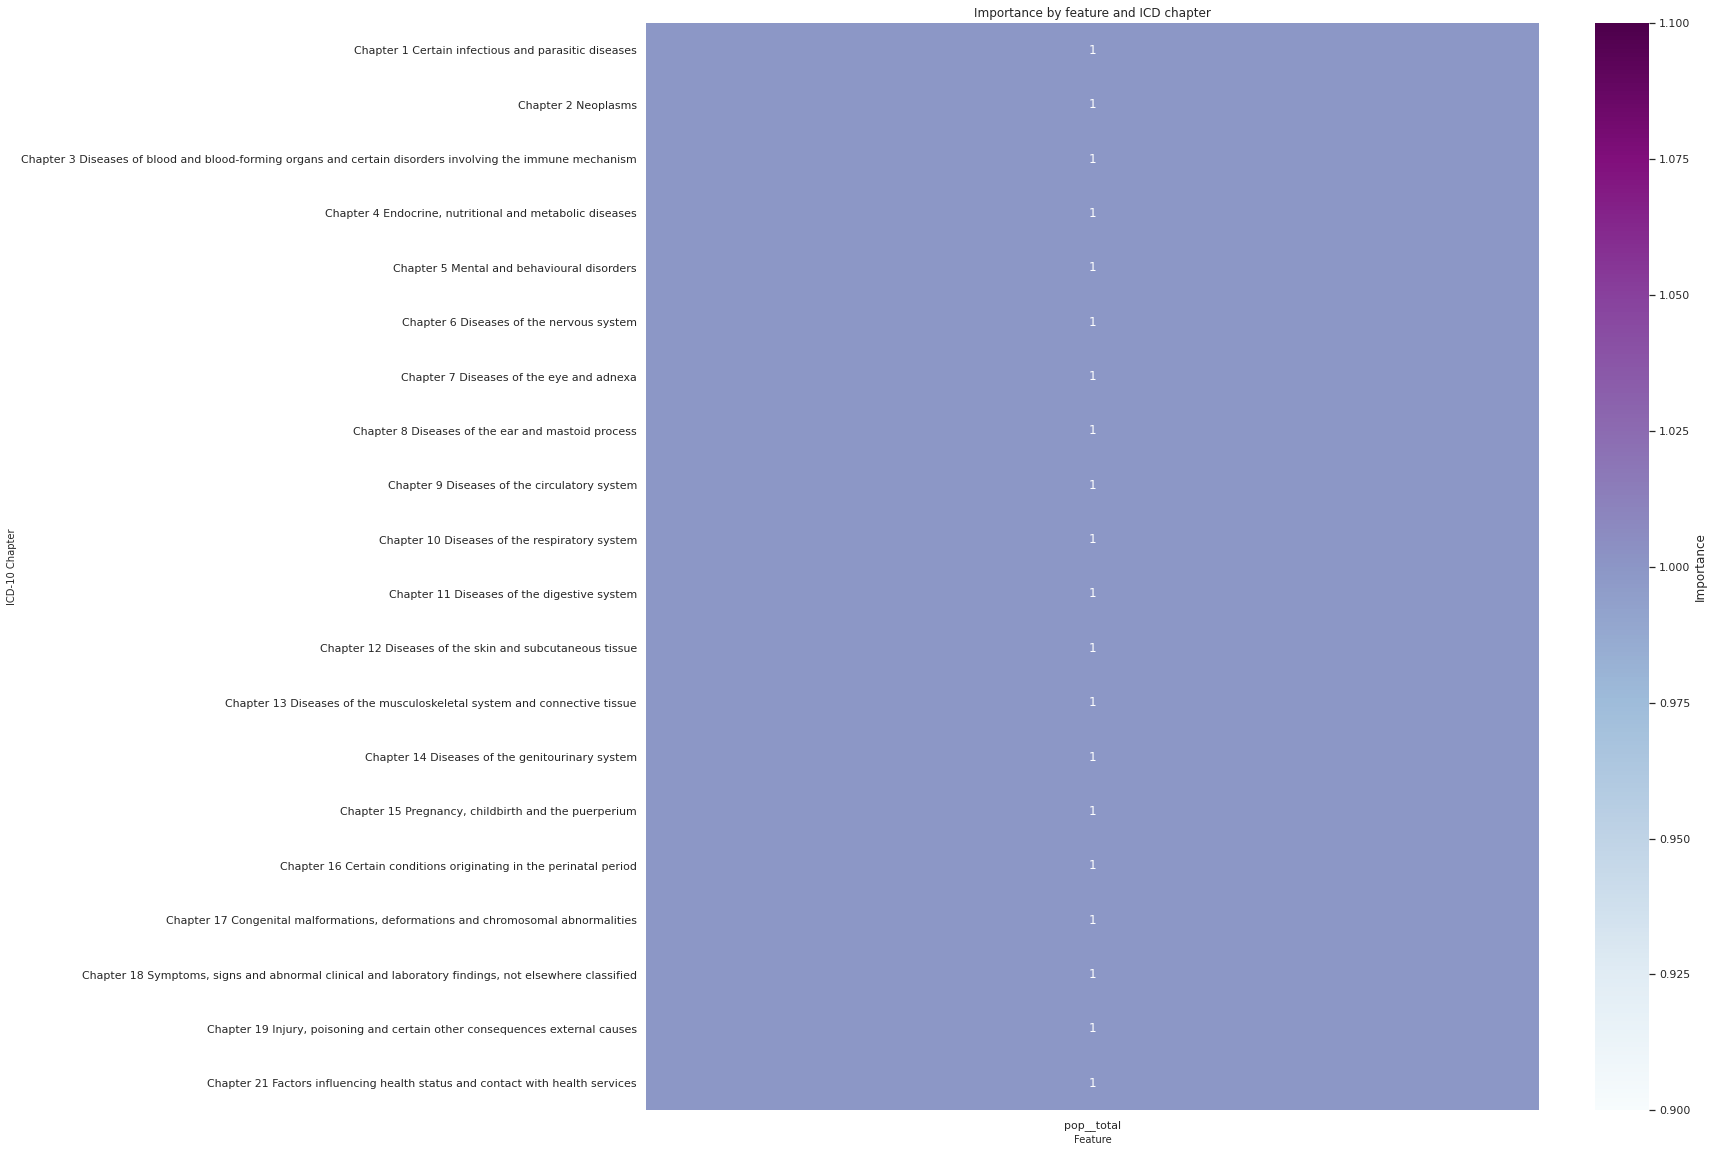

In [ ]:
# Print ExtraTreesRegressor feature importance by chapter. MultiOutputRegressor required for this.
model = MultiOutputRegressor(sklearn.ensemble.ExtraTreesRegressor())
model.fit(x_train, y_train)
print(f"{model}  score: {model.score(x_test, y_test)}")

importances = []
for c, m in zip(target_chapters, model.estimators_):
    imp = {k: v for k, v in zip(x_train.columns, m.feature_importances_)}
    imp["Chapter"] = c
    importances.append(imp)
importances = pd.DataFrame(importances).set_index("Chapter")
seaborn.heatmap(importances,
                cmap="BuPu",
                annot=True,
                #fmt="g",
                cbar_kws={'label': 'Importance'})
plt.xlabel('Feature', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("Importance by feature and ICD chapter")

In [ ]:
# ExtraTreesRegressor has the best score
model = sklearn.ensemble.ExtraTreesRegressor()
model.fit(x_test, y_test) # Train on 2018
print(f"{model} score: {model.score(x_train, y_train)}") # Predict 2013
print(f"Feature importances:")
display({k: v for k, v in zip(x_train.columns, model.feature_importances_)})

model.fit(x_train, y_train) # Train on 2013
print(f"{model} score: {model.score(x_test, y_test)}") # Predict 2018
print(f"Feature importances:")
{k: v for k, v in zip(x_train.columns, model.feature_importances_)}

ExtraTreesRegressor() score: 0.7725225427623236
Feature importances:


{'pop__total': 1.0}

ExtraTreesRegressor() score: 0.7762570197976115
Feature importances:


{'pop__total': 1.0}

In [ ]:
pred = pd.DataFrame(model.predict(x_test))
pred.columns = target_chapters
pred.index = DHB.DHB2015_Name
pred

,Chapter 1 Certain infectious and parasitic diseases,Chapter 2 Neoplasms,Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"Chapter 4 Endocrine, nutritional and metabolic diseases",Chapter 5 Mental and behavioural disorders,Chapter 6 Diseases of the nervous system,Chapter 7 Diseases of the eye and adnexa,Chapter 8 Diseases of the ear and mastoid process,Chapter 9 Diseases of the circulatory system,Chapter 10 Diseases of the respiratory system,Chapter 11 Diseases of the digestive system,Chapter 12 Diseases of the skin and subcutaneous tissue,Chapter 13 Diseases of the musculoskeletal system and connective tissue,Chapter 14 Diseases of the genitourinary system,"Chapter 15 Pregnancy, childbirth and the puerperium",Chapter 16 Certain conditions originating in the perinatal period,"Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","Chapter 19 Injury, poisoning and certain other consequences external causes",Chapter 21 Factors influencing health status and contact with health services
DHB2015_Name,,,,,,,,,,,,,,,,,,,,
Northland,1244.46,3530.96,528.40,1121.28,1265.48,1061.46,1445.80,378.84,3652.94,3186.30,4145.34,1181.20,2092.70,2146.46,3450.48,696.44,306.88,4194.94,4450.46,4136.38
Waitemata,4589.00,8449.00,1825.00,2649.00,2845.00,3212.00,2569.00,1419.00,9970.00,8635.00,11904.00,3352.00,7746.00,7387.00,11794.00,1790.00,1199.00,18782.00,16409.00,16028.00
Auckland,4371.08,8505.52,1766.80,2591.40,2905.96,3159.20,2516.68,1374.00,9777.40,8463.04,11487.60,3168.28,7652.40,7150.36,11823.40,1785.08,1165.40,17563.40,15841.52,16542.68
Counties Manukau,4589.00,8449.00,1825.00,2649.00,2845.00,3212.00,2569.00,1419.00,9970.00,8635.00,11904.00,3352.00,7746.00,7387.00,11794.00,1790.00,1199.00,18782.00,16409.00,16028.00
Waikato,3082.43,6006.29,1230.26,2207.23,2213.93,2682.79,2418.00,1088.73,6320.36,6826.04,7990.91,2520.09,4850.03,4906.98,9265.62,1372.90,770.70,10349.81,11739.19,15191.48
Lakes,786.24,2436.84,519.10,652.46,660.76,699.92,500.40,257.96,2353.84,1813.62,2719.68,644.96,1702.00,1308.40,2512.20,421.30,198.92,3997.28,2713.30,4034.88
Bay of Plenty,1860.90,3435.60,672.16,1196.86,2137.84,1837.38,1191.18,649.34,4352.14,3987.50,4875.00,1501.10,3795.02,3281.32,6276.44,936.22,603.00,7266.98,6943.22,6512.54
Tairawhiti,340.02,926.15,145.12,347.97,350.42,330.12,315.54,118.65,1028.05,953.58,1106.10,300.80,675.88,587.61,965.12,145.11,112.55,992.25,1150.70,1759.37
Taranaki,788.67,2684.58,489.73,638.48,676.15,721.25,544.11,257.78,2429.02,1832.37,2788.29,615.11,1813.96,1448.56,2460.57,399.58,202.13,3845.51,2970.40,3856.62


Text(0.5, 1.0, 'Discharges by DHB and ICD chapter in 2018')

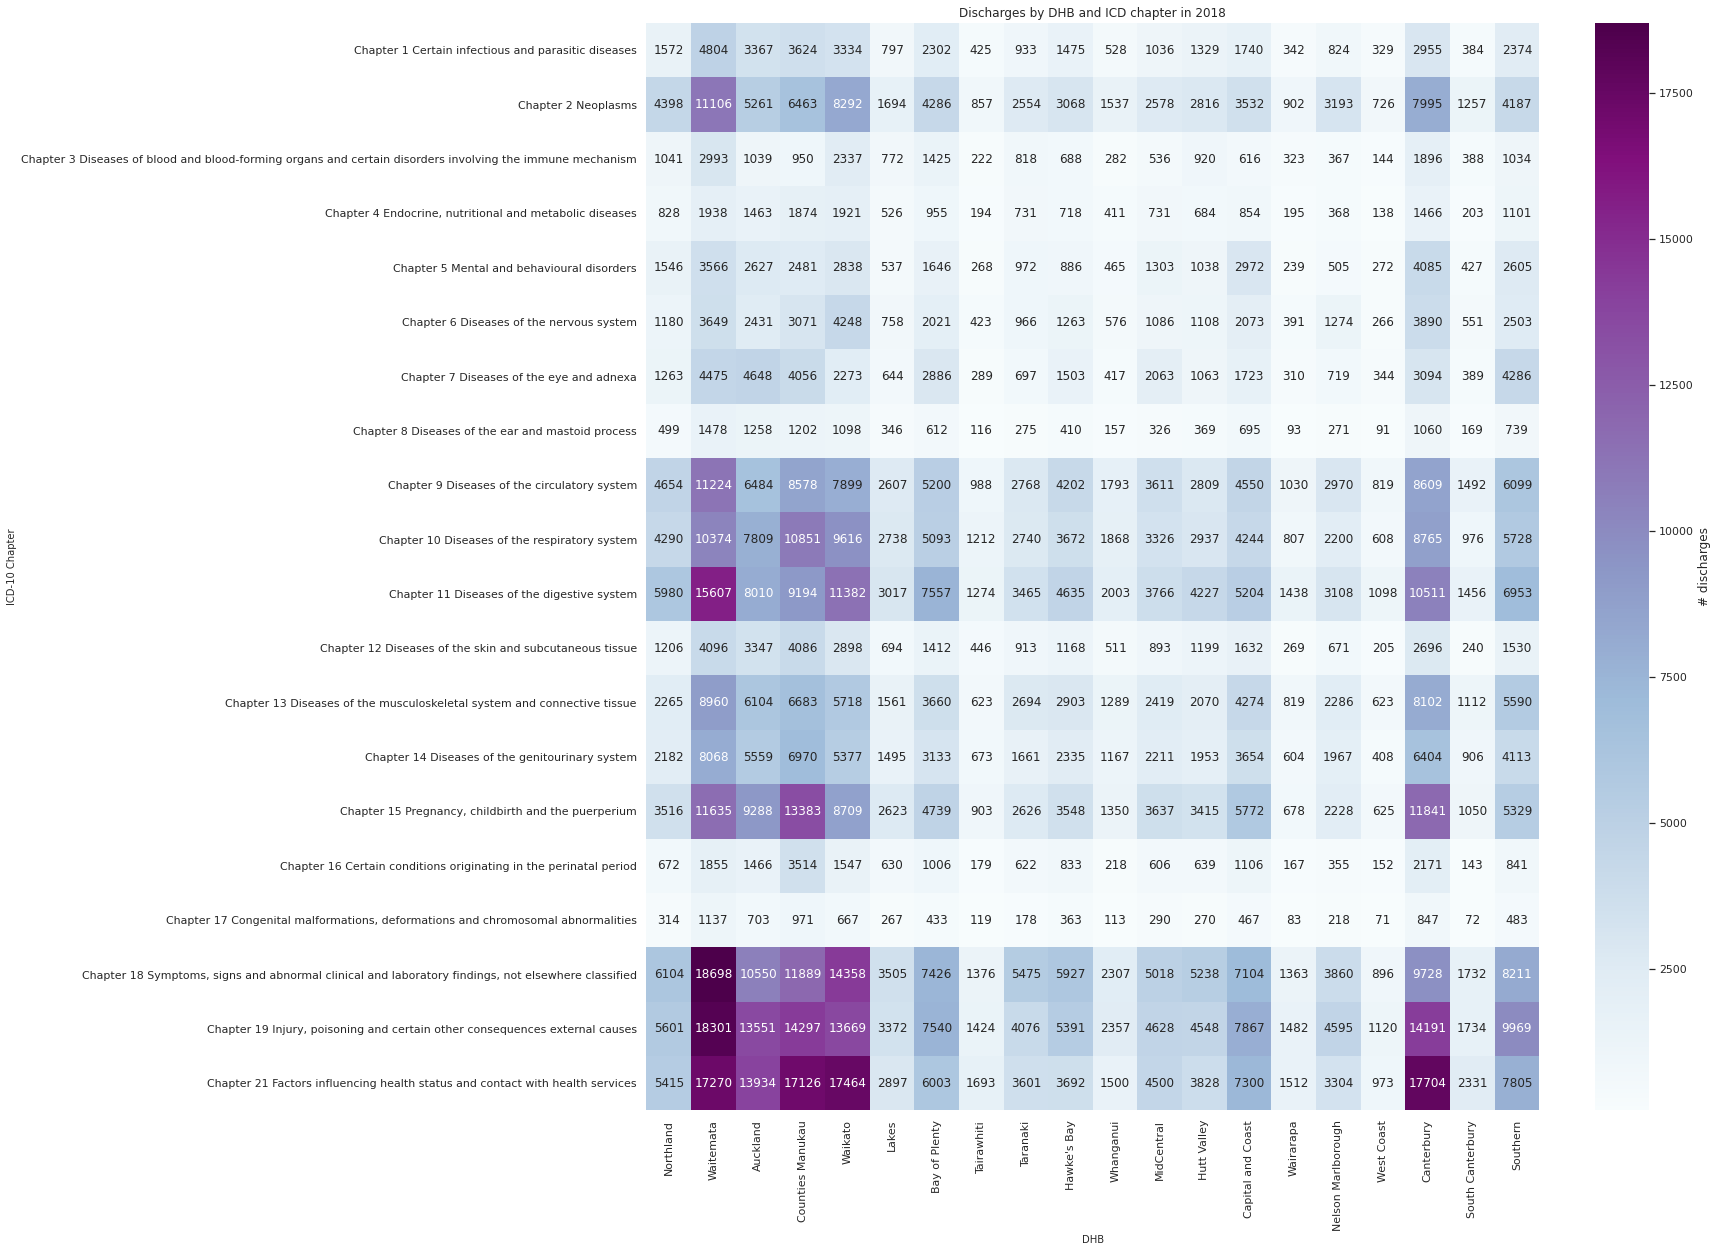

In [ ]:
seaborn.heatmap(y_test.T,
                cmap="BuPu",
                annot=True,
                fmt="g",
                cbar_kws={'label': '# discharges'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("Discharges by DHB and ICD chapter in 2018")

Text(0.5, 1.0, 'ExtraTreesRegressor model error')

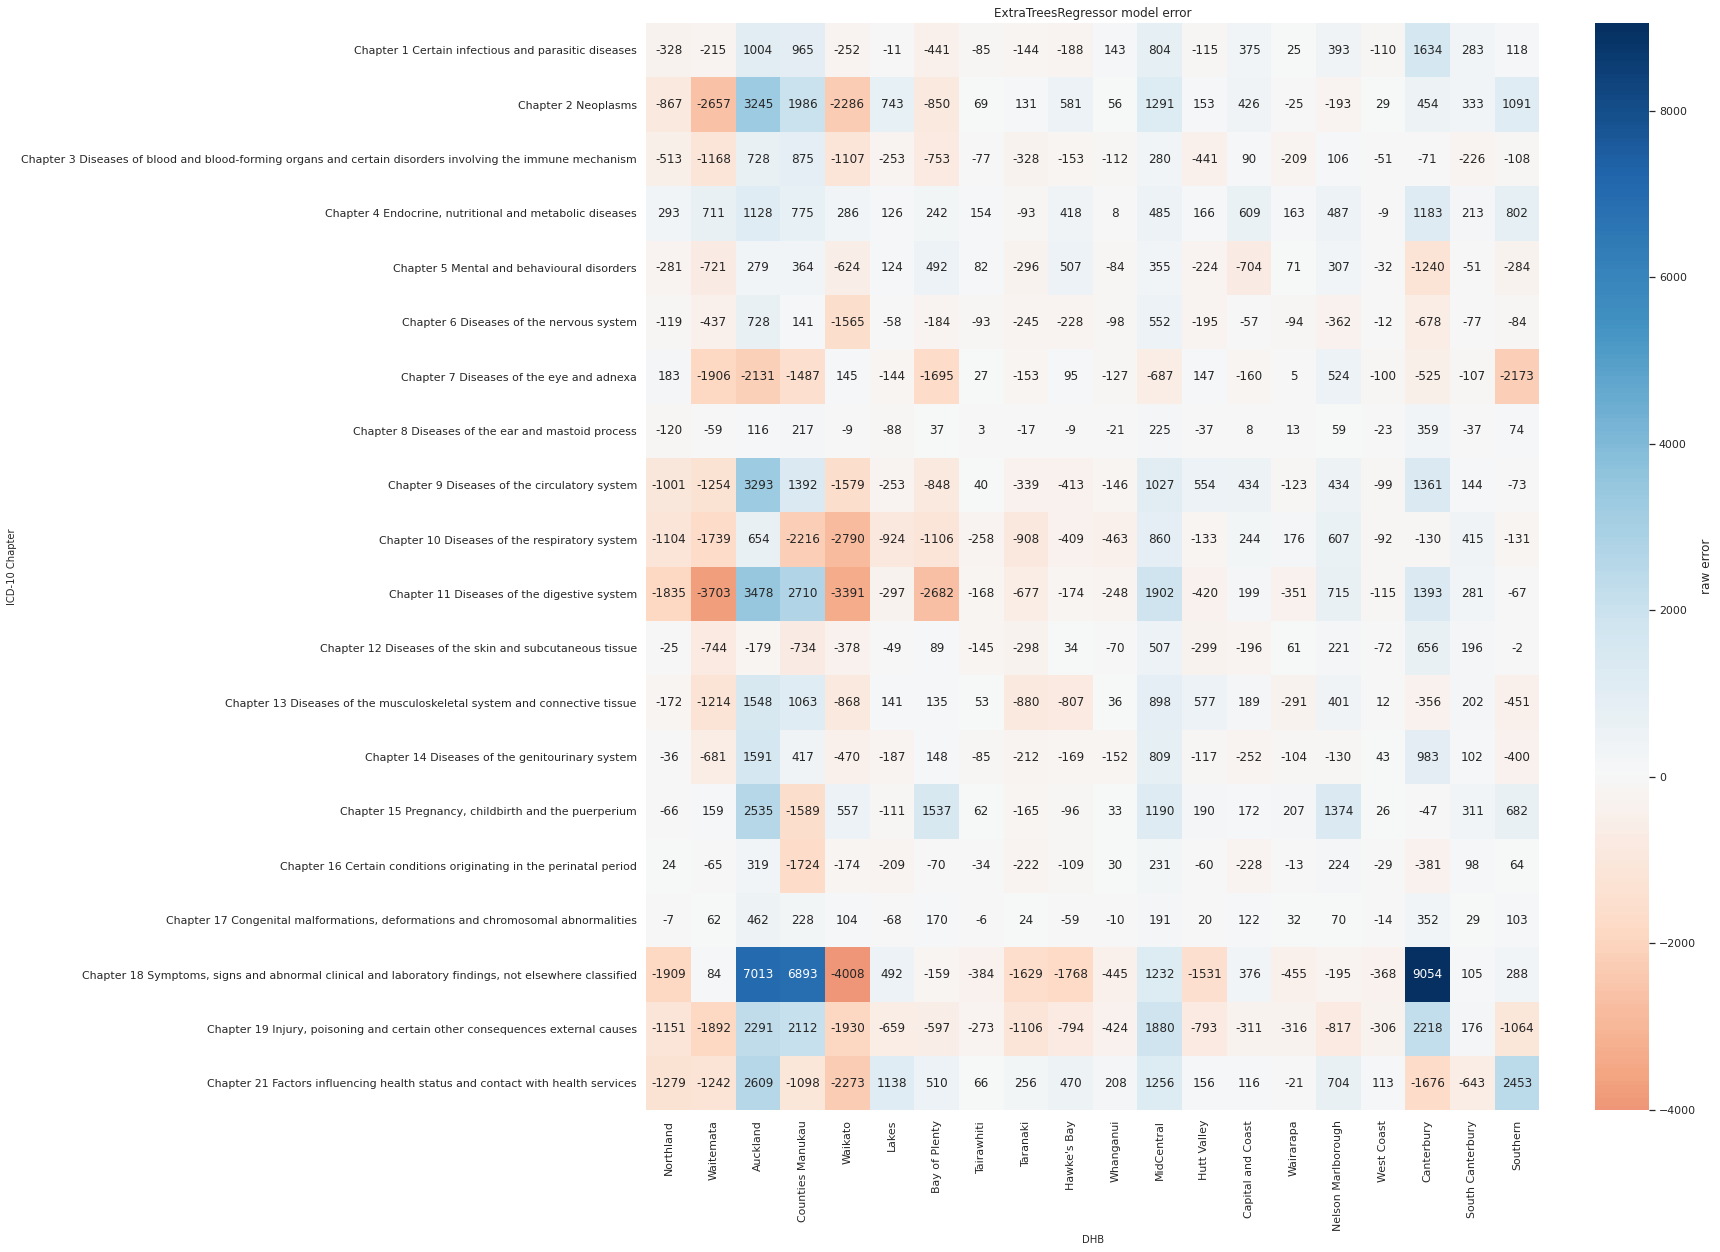

In [ ]:
err = pred - y_test
seaborn.heatmap(err.T,
                center=0,
                cmap="RdBu",
                annot=True,
                fmt=".0f",
                cbar_kws={'label': 'raw error'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("ExtraTreesRegressor model error")

Text(0.5, 1.0, 'ExtraTreesRegressor model error')

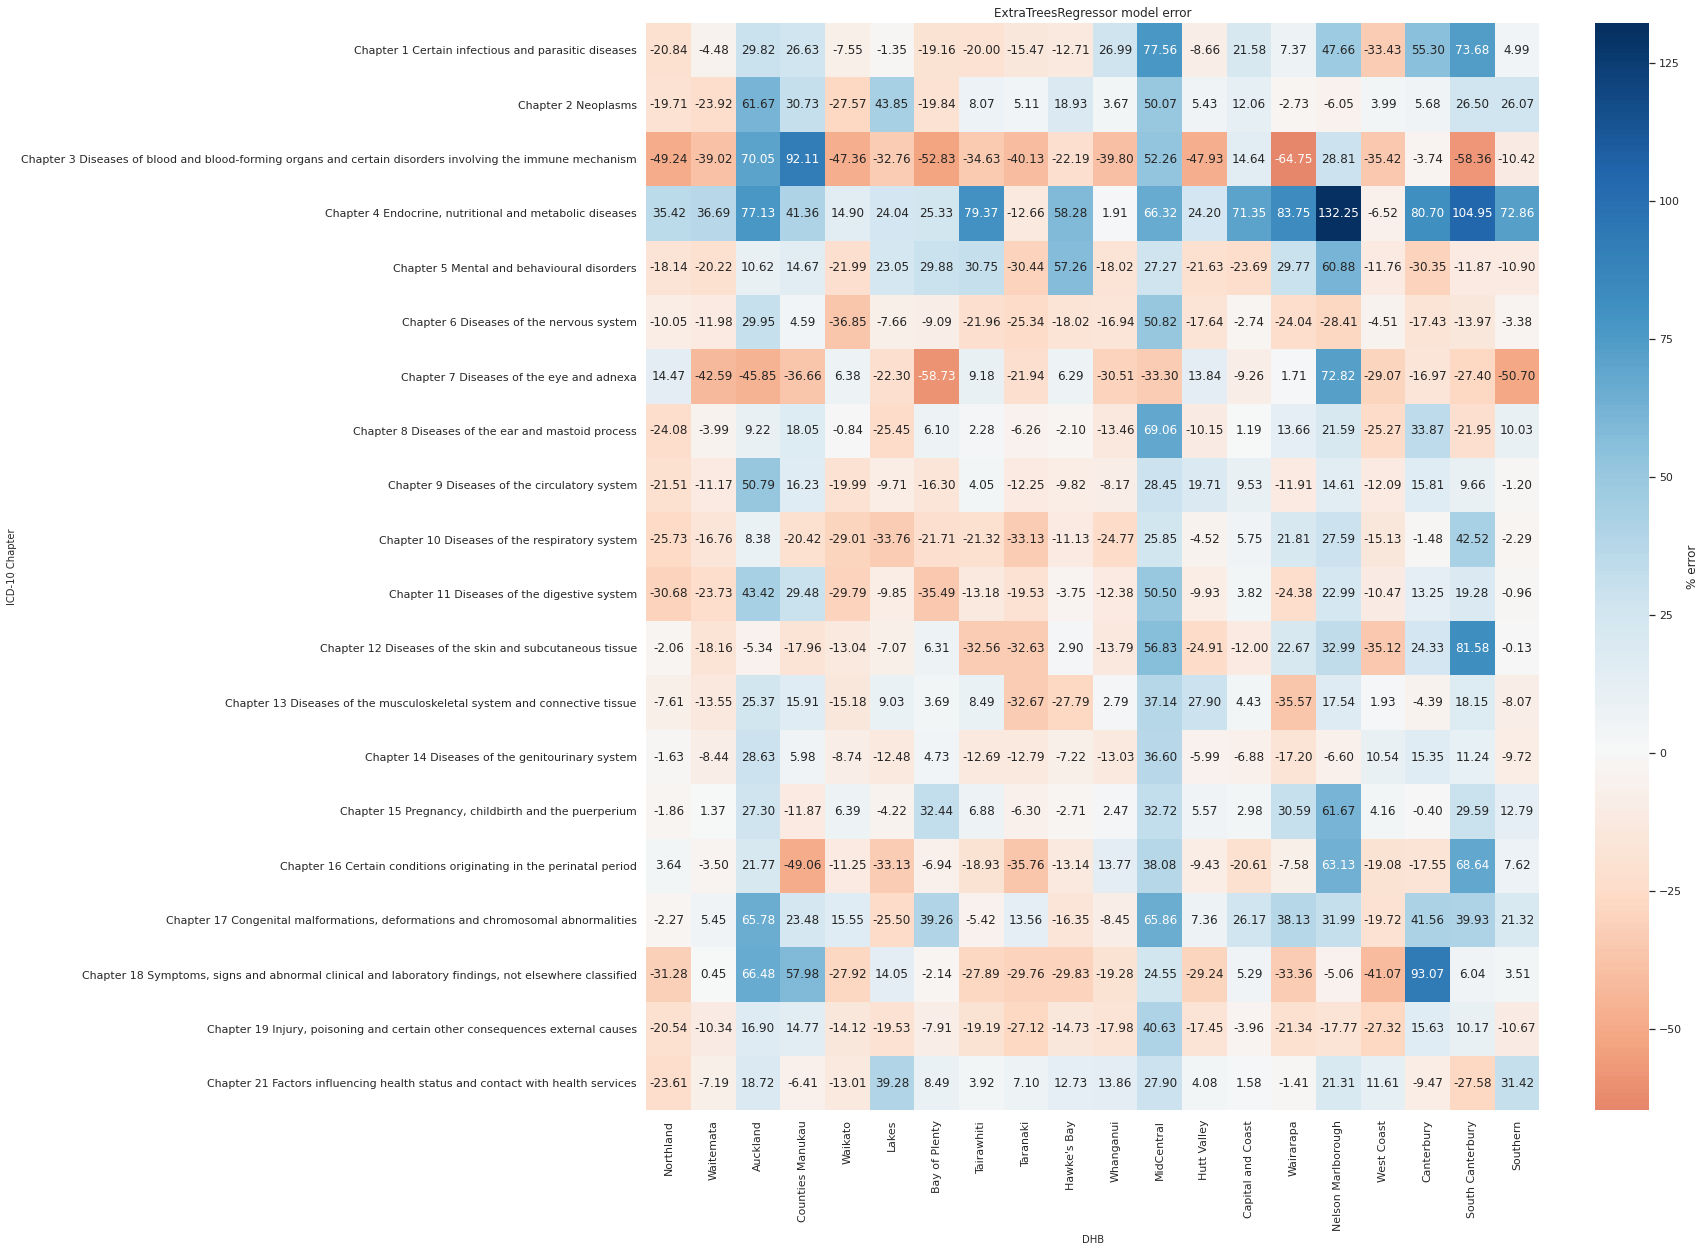

In [ ]:
pct_err = ((pred - y_test) / y_test) * 100
seaborn.heatmap(pct_err.T,
                cmap="RdBu",
                center=0,
                annot=True,
                fmt=".2f",
                cbar_kws={'label': '% error'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("ExtraTreesRegressor model error")

In [ ]:
# Now fit the model on both 2013 and 2018 data, to predict the future
x_train2 = pd.concat([x_train, x_test])
y_train2 = pd.concat((y_train, y_test))
print(x_train2.shape, y_train2.shape)

model = sklearn.ensemble.ExtraTreesRegressor()
model.fit(x_train2, y_train2)
{k: v for k, v in zip(x_train.columns, model.feature_importances_)}

(40, 1) (40, 20)


{'pop__total': 1.0}

In [ ]:
future_years = ['2023', '2028', '2033', '2038', '2043', '2048']
for year in future_years:
    x_test, _ = get_data_for_year(year)
    pred = pd.DataFrame(model.predict(x_test))
    pred.columns = [f"predicted_discharges_{year}_{k}" for k in target_chapters]
    DHB = pd.concat([DHB, pred], axis=1)

In [ ]:
cols = [k for k in DHB.columns if "discharges" in k.lower()]
DHB[["DHB2015_Name"] + cols].sort_values(by=f"predicted_discharges_2048_{target_chapters[0]}", ascending=False)

,DHB2015_Name,discharges_2013_Chapter 1 Certain infectious and parasitic diseases,discharges_2013_Chapter 2 Neoplasms,discharges_2013_Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"discharges_2013_Chapter 4 Endocrine, nutritional and metabolic diseases",discharges_2013_Chapter 5 Mental and behavioural disorders,discharges_2013_Chapter 6 Diseases of the nervous system,discharges_2013_Chapter 7 Diseases of the eye and adnexa,discharges_2013_Chapter 8 Diseases of the ear and mastoid process,discharges_2013_Chapter 9 Diseases of the circulatory system,...,predicted_discharges_2048_Chapter 11 Diseases of the digestive system,predicted_discharges_2048_Chapter 12 Diseases of the skin and subcutaneous tissue,predicted_discharges_2048_Chapter 13 Diseases of the musculoskeletal system and connective tissue,predicted_discharges_2048_Chapter 14 Diseases of the genitourinary system,"predicted_discharges_2048_Chapter 15 Pregnancy, childbirth and the puerperium",predicted_discharges_2048_Chapter 16 Certain conditions originating in the perinatal period,"predicted_discharges_2048_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","predicted_discharges_2048_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","predicted_discharges_2048_Chapter 19 Injury, poisoning and certain other consequences external causes",predicted_discharges_2048_Chapter 21 Factors influencing health status and contact with health services
2,Auckland,3520,4967,1047,2243,2284,2354,2614,1198,6093,...,15607.00,4096.00,8960.00,8068.00,11635.00,1855.00,1137.00,18698.00,18301.00,17270.00
3,Counties Manukau,4063,7369,1614,3240,2160,2974,2559,1300,7884,...,15607.00,4096.00,8960.00,8068.00,11635.00,1855.00,1137.00,18698.00,18301.00,17270.00
4,Waikato,2627,7088,1421,2170,2141,3025,2214,975,6557,...,15607.00,4096.00,8960.00,8068.00,11635.00,1855.00,1137.00,18698.00,18301.00,17270.00
17,Canterbury,2773,8920,1340,2169,3353,2772,2133,1044,8365,...,15607.00,4096.00,8960.00,8068.00,11635.00,1855.00,1137.00,18698.00,18301.00,17270.00
1,Waitemata,4589,8449,1825,2649,2845,3212,2569,1419,9970,...,15607.00,4096.00,8960.00,8068.00,11635.00,1855.00,1137.00,18698.00,18301.00,17270.00
19,Southern,2450,4707,770,1819,2378,2227,2081,762,5858,...,8873.96,2084.76,4743.60,4281.36,7983.20,1241.20,667.92,11008.72,10720.64,15141.08
13,Capital and Coast,1863,3393,658,1195,2185,1857,1173,659,4324,...,6557.09,1427.71,5429.41,3803.48,5321.58,812.91,521.16,7903.07,9090.26,8180.77
6,Bay of Plenty,1828,4103,894,1226,1399,1530,1476,498,4793,...,6631.79,1447.01,5459.71,3861.88,5322.98,818.21,513.96,7961.17,9256.06,8109.87
11,MidCentral,1136,3234,511,1083,943,1127,1063,322,3309,...,4943.52,1554.56,3997.52,3431.92,6186.08,1003.60,561.72,7272.32,7303.16,6843.68
12,Hutt Valley,1166,2449,584,763,832,921,665,366,2667,...,5038.50,1179.40,2711.60,2289.10,3538.40,784.70,348.30,5980.10,5454.00,4208.90


In [ ]:
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,predicted_discharges_2048_Chapter 11 Diseases of the digestive system,predicted_discharges_2048_Chapter 12 Diseases of the skin and subcutaneous tissue,predicted_discharges_2048_Chapter 13 Diseases of the musculoskeletal system and connective tissue,predicted_discharges_2048_Chapter 14 Diseases of the genitourinary system,"predicted_discharges_2048_Chapter 15 Pregnancy, childbirth and the puerperium",predicted_discharges_2048_Chapter 16 Certain conditions originating in the perinatal period,"predicted_discharges_2048_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","predicted_discharges_2048_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","predicted_discharges_2048_Chapter 19 Injury, poisoning and certain other consequences external causes",predicted_discharges_2048_Chapter 21 Factors influencing health status and contact with health services
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,4600.02,1007.18,2692.02,2413.84,3879.44,694.00,321.46,5547.76,5268.64,4830.66
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,15607.00,4096.00,8960.00,8068.00,11635.00,1855.00,1137.00,18698.00,18301.00,17270.00
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,15607.00,4096.00,8960.00,8068.00,11635.00,1855.00,1137.00,18698.00,18301.00,17270.00
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,15607.00,4096.00,8960.00,8068.00,11635.00,1855.00,1137.00,18698.00,18301.00,17270.00
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,15607.00,4096.00,8960.00,8068.00,11635.00,1855.00,1137.00,18698.00,18301.00,17270.00
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,3286.15,781.40,2500.45,1721.55,2514.70,532.40,191.30,4703.60,3949.65,3436.50
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,6631.79,1447.01,5459.71,3861.88,5322.98,818.21,513.96,7961.17,9256.06,8109.87
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,1189.64,258.78,1035.92,841.72,1144.98,129.42,105.68,1305.70,1216.06,2379.72
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,3045.98,604.68,2240.54,1802.86,2365.24,412.08,209.16,3667.72,3779.98,3215.60
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,4454.02,1161.34,2160.02,2132.12,3475.98,646.48,314.58,5049.56,4719.40,4636.06


In [ ]:
DHB.drop(columns="geometry").to_csv("output/DHBs.csv", index=False)